# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '..' not in sys.path:
    sys.path.insert(0, '..')

In [3]:
from src.m_utils import constants as cts
from src.base.data_loaders.data_loader import DLName
from src.base.gt_loaders.gt_names import GTName
from src.exp_runner import ExperimentRunner

from src.base.experiment.dataset.benchmark_dataset import BenchmarkDataset
from src.base.experiment.evaluation.model_evaluator import DataSource, DataPredSelection
from src.base.experiment.training.base_models import BaseModel
from src.base.experiment.training.optimizers import Optimizer

from src.m_utils.mtl_approach import MTLApproach
from src.m_utils.nas_mtl_approach import NAS_MTLApproach
from src.base.experiment.tasks.task import ICAO_REQ, MNIST_TASK, CELEB_A_TASK, CIFAR_10_TASK, FASHION_MNIST_TASK

 ==> Restrict GPU memory growth: True


# Start Network runner

In [4]:
N_TRIALS = 100
NAS_APPROACH = NAS_MTLApproach.APPROACH_2
NAS_APPROACH_STR = 'nas_approach_2'
N_CHILD_EPOCHS = 1
N_CHILD_EPOCHS_STR = '1_child_epochs'
CONTROLLER_EPOCHS = 10
N_EPOCHS = 3

DATASET = BenchmarkDataset.MNIST
TASKS = list(MNIST_TASK)

kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'neural_arch_search',
        'description': f'{NAS_APPROACH.value} with {DATASET.value["name"].upper()} dataset with {N_TRIALS} trials and patience and {N_CHILD_EPOCHS} child epoch',
        'tags': ['nas', f'{NAS_APPROACH_STR}', 'benchmark', f'{DATASET.value["name"]}', f'{N_CHILD_EPOCHS_STR}'],
        'src_files': ["../src/**/*.py"]
    },
    'properties': {
        'approach': NAS_APPROACH,
        'benchmarking': {
            'use_benchmark_data': True,
            'benchmark_dataset': DATASET,
            'tasks': TASKS
        },
        'icao_data': {
            'icao_gt': {
                'use_gt_data': False,
                'gt_names': {
                    'train_validation': [],
                    'test': [],
                    'train_validation_test': [GTName.FVC]
                },
            },
            'icao_dl': {
                'use_dl_data': False,
                'tagger_model': None
            },
            'reqs': list(ICAO_REQ),
            'aligned': False
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'exec_nas': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.MOBILENET_V2,
        'batch_size': 32,
        'n_epochs': N_EPOCHS,
        'early_stopping': 5,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {
        'max_blocks_per_branch': 5,
        'n_child_epochs': N_CHILD_EPOCHS,
        'controller_epochs': CONTROLLER_EPOCHS,
        'controller_batch_size': 32,
        'n_trials': N_TRIALS
    }
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 12811
Process ID: 100871
---------------------------
-----
Use Neptune:  False
-----
-------------------
Args: 
{'exp_params': {'description': 'approach_2 with MNIST dataset with 100 trials '
                               'and patience and 1 child epoch',
                'name': 'neural_arch_search',
                'src_files': ['../src/**/*.py'],
                'tags': ['nas',
                         'nas_approach_2',
                         'benchmark',
                         'mnist',
                         '1_child_epochs']},
 'nas_params': {'controller_batch_size': 32,
                'controller_epochs': 10,
                'max_blocks_per_branch': 5,
                'n_child_epochs': 1,
                'n_trials': 100},
 'net_train_params': {'base_model': <BaseModel.MOBILENET_V2: {'name': 'mobilnet_v2', 'target_size': (224, 224), 'prep_function': <function prepro

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# Load Data

In [5]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
TrainData.shape: (48000, 11)
ValidationData.shape: (12000, 11)
TestData.shape: (10000, 11)
Data loaded


In [6]:
runner.train_data.head()

,img_name,n_0,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9
0,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# <font color='red'>Producing Fake Data</font>

In [7]:
runner.produce_fake_data()

-------------------- producing fake data for experimental purposes -------------------
fake_train_data.shape: (500, 11)
fake_validation_data_df.shape: (100, 11)
fake_test_data_df.shape: (50, 11)


# Data Generators

In [8]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 500 validated image filenames.
Found 100 validated image filenames.
Found 50 validated image filenames.
TOTAL: 650

Logging class indices
 .. MTL model not logging class indices!

Using benchmarking dataset. Not logging class labels!


# Setup Experiment

In [9]:
runner.setup_experiment()

-------------------- create experiment -------------------
Not using Neptune


# Labels Distribution

In [10]:
%%capture
runner.summary_labels_dist()

# Neural Architecture Search

-------------------- run neural architecture search -------------------
Executing neural architectural search
  Memory reseted

==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is empty
   Compiling Controller RNN...
    ..done!
Softmax predict on new input_x
 controller_pred: [[0.25358167 0.24057713 0.24485742 0.2609838 ]]


 ------ Training 1 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.88477, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 81ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.45830 | EER_interp: 0.45030 | ACC: 0.55000
  Task  1: n_1             | EER_mean: 0.50940 | EER_interp: 0.49940 | ACC: 0.50000
  Task  2: n_2             | EER_mean: 0.44440 | EER_interp: 0.43960 | ACC: 0.56000
  Task  3: n_3             | EER_mean: 0.47060 | EER_interp: 0.47000 | ACC: 0.53000
  Task  4: n_4             | EER_mean: 0.56600 | EER_interp: 0.55960 | ACC: 0.44000
  Task  5: n_5             | EER_mean: 0.43640 | EER_interp: 0.45160 | ACC: 0.55000
  Task  6: n_6             | EER_mean: 0.57410 | EER_interp: 0.54790 | ACC: 0.45000
  Task  7: n_7             | EER_mean: 0.54550 | EER_interp: 0.54960 | ACC: 0.45000
  Task  8: n_8             | EER_mean: 0.50910 | EER_interp: 0.49900 | ACC: 0.50000
  Task  9: n_9             | EER_mean: 0.43140 | EER_interp: 0.43000 | ACC: 0.

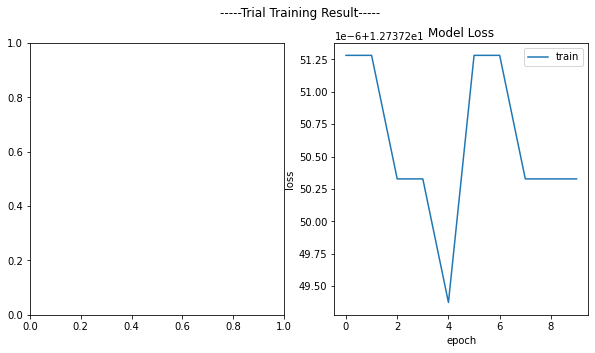

Evaluating targets...
1/1 [==============================] - 0s 102ms/step - loss: 12.7245
  Loss: 12.72451305
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25358167 0.24057713 0.24485742 0.2609838 ]]
  LSTM entry: [[[0.25358167 0.24057713 0.24485742 0.2609838 ]]]
Softmax predict on new input_x
 controller_pred: [[0.25074336 0.2467597  0.24847062 0.2540263 ]]


 ------ Training 2 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.82124, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.41670 | EER_interp: 0.41020 | ACC: 0.59000
  Task  1: n_1             | EER_mean: 0.43400 | EER_interp: 0.44040 | ACC: 0.56000
  Task  2: n_2             | EER_mean: 0.36960 | EER_interp: 0.37000 | ACC: 0.63000
  Task  3: n_3             | EER_mean: 0.44900 | EER_interp: 0.45980 | ACC: 0.54000
  Task  4: n_4             | EER_mean: 0.47170 | EER_interp: 0.46990 | ACC: 0.53000
  Task  5: n_5             | EER_mean: 0.45450 | EER_interp: 0.44940 | ACC: 0.55000
  Task  6: n_6             | EER_mean: 0.48150 | EER_interp: 0.47990 | ACC: 0.52000
  Task  7: n_7             | EER_mean: 0.48210 | EER_interp: 0.47970 | ACC: 0.52000
  Task  8: n_8             | EER_mean: 0.53330 | EER_interp: 0.54840 | ACC: 0.45000
  Task  9: n_9             | EER_mean: 0.46940 | EER_interp: 0.46020 | ACC: 0.

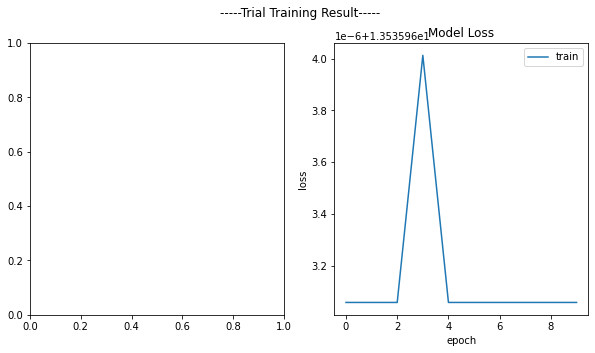

Evaluating targets...
1/1 [==============================] - 0s 105ms/step - loss: 13.5224
  Loss: 13.52242756
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25074336 0.2467597  0.24847062 0.2540263 ]]
  LSTM entry: [[[0.25074336 0.2467597  0.24847062 0.2540263 ]]]
Softmax predict on new input_x
 controller_pred: [[0.25074032 0.2467641  0.24839003 0.25410554]]


 ------ Training 3 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.74991, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.55770 | EER_interp: 0.56010 | ACC: 0.44000
  Task  1: n_1             | EER_mean: 0.52830 | EER_interp: 0.53010 | ACC: 0.47000
  Task  2: n_2             | EER_mean: 0.48150 | EER_interp: 0.47990 | ACC: 0.52000
  Task  3: n_3             | EER_mean: 0.55100 | EER_interp: 0.55000 | ACC: 0.45000
  Task  4: n_4             | EER_mean: 0.51060 | EER_interp: 0.51000 | ACC: 0.49000
  Task  5: n_5             | EER_mean: 0.48890 | EER_interp: 0.48080 | ACC: 0.52000
  Task  6: n_6             | EER_mean: 0.54350 | EER_interp: 0.54020 | ACC: 0.46000
  Task  7: n_7             | EER_mean: 0.53570 | EER_interp: 0.52920 | ACC: 0.47000
  Task  8: n_8             | EER_mean: 0.54550 | EER_interp: 0.55060 | ACC: 0.45000
  Task  9: n_9             | EER_mean: 0.52940 | EER_interp: 0.54020 | ACC: 0.

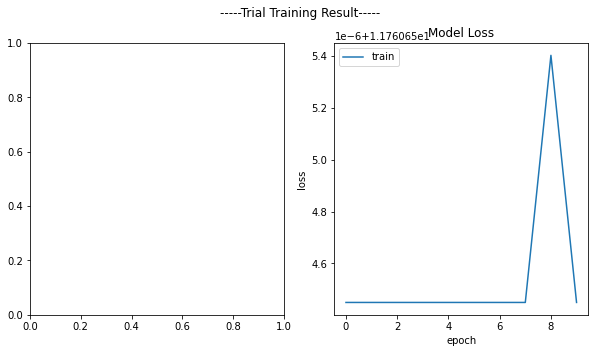

Evaluating targets...
1/1 [==============================] - 0s 98ms/step - loss: 11.7489
  Loss: 11.74889374
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25074032 0.2467641  0.24839003 0.25410554]]
  LSTM entry: [[[0.25074032 0.2467641  0.24839003 0.25410554]]]
Softmax predict on new input_x
 controller_pred: [[0.25073993 0.24676342 0.24839179 0.25410485]]


 ------ Training 4 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.90514, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.50000 | EER_interp: 0.50000 | ACC: 0.50000
  Task  1: n_1             | EER_mean: 0.57450 | EER_interp: 0.57020 | ACC: 0.43000
  Task  2: n_2             | EER_mean: 0.50000 | EER_interp: 0.47820 | ACC: 0.52000
  Task  3: n_3             | EER_mean: 0.46940 | EER_interp: 0.47000 | ACC: 0.53000
  Task  4: n_4             | EER_mean: 0.62260 | EER_interp: 0.61980 | ACC: 0.38000
  Task  5: n_5             | EER_mean: 0.47270 | EER_interp: 0.48080 | ACC: 0.52000
  Task  6: n_6             | EER_mean: 0.54350 | EER_interp: 0.54960 | ACC: 0.45000
  Task  7: n_7             | EER_mean: 0.52270 | EER_interp: 0.52030 | ACC: 0.48000
  Task  8: n_8             | EER_mean: 0.50910 | EER_interp: 0.49900 | ACC: 0.50000
  Task  9: n_9             | EER_mean: 0.44900 | EER_interp: 0.44020 | ACC: 0.

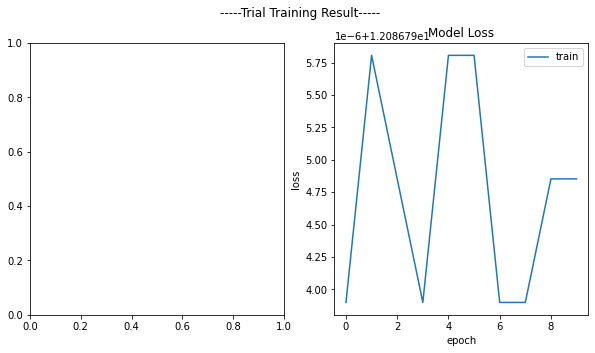

Evaluating targets...
1/1 [==============================] - 0s 101ms/step - loss: 12.0747
  Loss: 12.07470894
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073993 0.24676342 0.24839179 0.25410485]]
  LSTM entry: [[[0.25073993 0.24676342 0.24839179 0.25410485]]]
Softmax predict on new input_x
 controller_pred: [[0.25074002 0.24676299 0.24839218 0.25410485]]


 ------ Training 5 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.92893, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.47920 | EER_interp: 0.47040 | ACC: 0.53000
  Task  1: n_1             | EER_mean: 0.53190 | EER_interp: 0.54900 | ACC: 0.45000
  Task  2: n_2             | EER_mean: 0.60870 | EER_interp: 0.61920 | ACC: 0.38000
  Task  3: n_3             | EER_mean: 0.51020 | EER_interp: 0.51980 | ACC: 0.48000
  Task  4: n_4             | EER_mean: 0.49060 | EER_interp: 0.49000 | ACC: 0.51000
  Task  5: n_5             | EER_mean: 0.50910 | EER_interp: 0.49900 | ACC: 0.50000
  Task  6: n_6             | EER_mean: 0.51850 | EER_interp: 0.53100 | ACC: 0.47000
  Task  7: n_7             | EER_mean: 0.37500 | EER_interp: 0.36930 | ACC: 0.63000
  Task  8: n_8             | EER_mean: 0.42220 | EER_interp: 0.41110 | ACC: 0.59000
  Task  9: n_9             | EER_mean: 0.52940 | EER_interp: 0.53000 | ACC: 0.

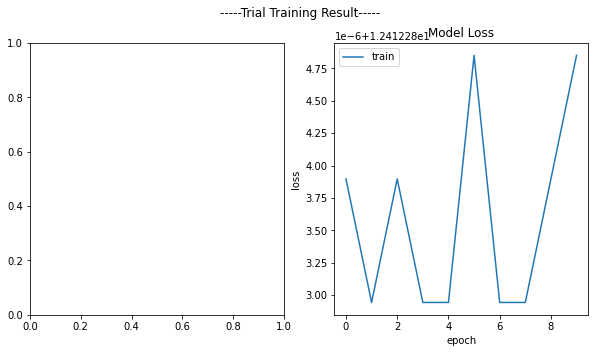

Evaluating targets...
1/1 [==============================] - 0s 98ms/step - loss: 12.3999
  Loss: 12.39987183
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25074002 0.24676299 0.24839218 0.25410485]]
  LSTM entry: [[[0.25074002 0.24676299 0.24839218 0.25410485]]]
Softmax predict on new input_x
 controller_pred: [[0.25073975 0.24676488 0.24839018 0.25410518]]


 ------ Training 6 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.93245, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.59620 | EER_interp: 0.60020 | ACC: 0.40000
  Task  1: n_1             | EER_mean: 0.50940 | EER_interp: 0.49940 | ACC: 0.50000
  Task  2: n_2             | EER_mean: 0.46300 | EER_interp: 0.45980 | ACC: 0.54000
  Task  3: n_3             | EER_mean: 0.47060 | EER_interp: 0.47000 | ACC: 0.53000
  Task  4: n_4             | EER_mean: 0.50940 | EER_interp: 0.49940 | ACC: 0.50000
  Task  5: n_5             | EER_mean: 0.42220 | EER_interp: 0.42930 | ACC: 0.57000
  Task  6: n_6             | EER_mean: 0.58700 | EER_interp: 0.58060 | ACC: 0.42000
  Task  7: n_7             | EER_mean: 0.45450 | EER_interp: 0.45040 | ACC: 0.55000
  Task  8: n_8             | EER_mean: 0.55560 | EER_interp: 0.54140 | ACC: 0.46000
  Task  9: n_9             | EER_mean: 0.46940 | EER_interp: 0.47000 | ACC: 0.

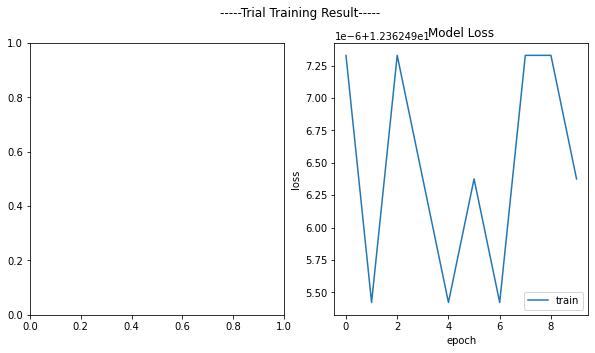

Evaluating targets...
1/1 [==============================] - 0s 97ms/step - loss: 12.3501
  Loss: 12.3501339
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073975 0.24676488 0.24839018 0.25410518]]
  LSTM entry: [[[0.25073975 0.24676488 0.24839018 0.25410518]]]
Softmax predict on new input_x
 controller_pred: [[0.25073963 0.24676555 0.24838945 0.25410536]]


 ------ Training 7 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.88995, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.41670 | EER_interp: 0.41020 | ACC: 0.59000
  Task  1: n_1             | EER_mean: 0.52830 | EER_interp: 0.51940 | ACC: 0.48000
  Task  2: n_2             | EER_mean: 0.45650 | EER_interp: 0.45040 | ACC: 0.55000
  Task  3: n_3             | EER_mean: 0.54900 | EER_interp: 0.53980 | ACC: 0.46000
  Task  4: n_4             | EER_mean: 0.46810 | EER_interp: 0.46990 | ACC: 0.53000
  Task  5: n_5             | EER_mean: 0.48890 | EER_interp: 0.48080 | ACC: 0.52000
  Task  6: n_6             | EER_mean: 0.63040 | EER_interp: 0.63000 | ACC: 0.37000
  Task  7: n_7             | EER_mean: 0.50000 | EER_interp: 0.50900 | ACC: 0.49000
  Task  8: n_8             | EER_mean: 0.55560 | EER_interp: 0.55960 | ACC: 0.44000
  Task  9: n_9             | EER_mean: 0.55100 | EER_interp: 0.53040 | ACC: 0.

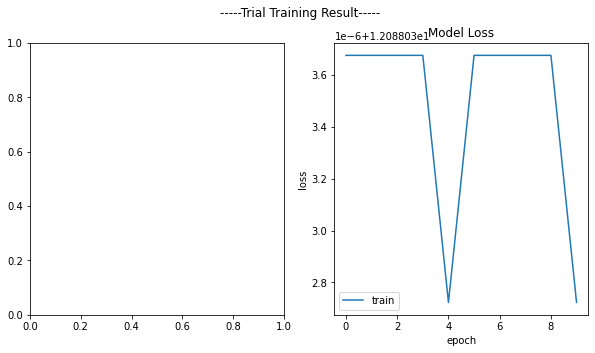

Evaluating targets...
1/1 [==============================] - 0s 102ms/step - loss: 12.0759
  Loss: 12.07594585
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073963 0.24676555 0.24838945 0.25410536]]
  LSTM entry: [[[0.25073963 0.24676555 0.24838945 0.25410536]]]
Softmax predict on new input_x
 controller_pred: [[0.25073957 0.24676597 0.24838895 0.2541055 ]]


 ------ Training 8 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.81050, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 24ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.50000 | EER_interp: 0.50000 | ACC: 0.50000
  Task  1: n_1             | EER_mean: 0.47170 | EER_interp: 0.46990 | ACC: 0.53000
  Task  2: n_2             | EER_mean: 0.37040 | EER_interp: 0.37000 | ACC: 0.63000
  Task  3: n_3             | EER_mean: 0.58820 | EER_interp: 0.57980 | ACC: 0.42000
  Task  4: n_4             | EER_mean: 0.50940 | EER_interp: 0.49940 | ACC: 0.50000
  Task  5: n_5             | EER_mean: 0.44440 | EER_interp: 0.43130 | ACC: 0.57000
  Task  6: n_6             | EER_mean: 0.54350 | EER_interp: 0.54020 | ACC: 0.46000
  Task  7: n_7             | EER_mean: 0.39290 | EER_interp: 0.40100 | ACC: 0.60000
  Task  8: n_8             | EER_mean: 0.47270 | EER_interp: 0.46970 | ACC: 0.53000
  Task  9: n_9             | EER_mean: 0.51020 | EER_interp: 0.51000 | ACC: 0.

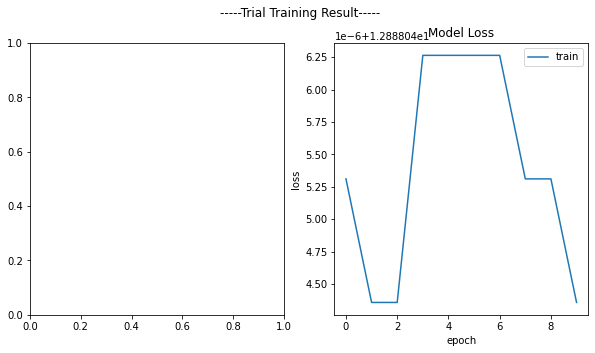

Evaluating targets...
1/1 [==============================] - 0s 98ms/step - loss: 12.8752
  Loss: 12.87515736
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073957 0.24676597 0.24838895 0.2541055 ]]
  LSTM entry: [[[0.25073957 0.24676597 0.24838895 0.2541055 ]]]
Softmax predict on new input_x
 controller_pred: [[0.25073954 0.24676642 0.24838844 0.25410563]]


 ------ Training 9 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 1.03780, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.43750 | EER_interp: 0.43030 | ACC: 0.57000
  Task  1: n_1             | EER_mean: 0.61700 | EER_interp: 0.61040 | ACC: 0.39000
  Task  2: n_2             | EER_mean: 0.61110 | EER_interp: 0.60990 | ACC: 0.39000
  Task  3: n_3             | EER_mean: 0.49020 | EER_interp: 0.49000 | ACC: 0.51000
  Task  4: n_4             | EER_mean: 0.48940 | EER_interp: 0.47110 | ACC: 0.53000
  Task  5: n_5             | EER_mean: 0.56360 | EER_interp: 0.57070 | ACC: 0.43000
  Task  6: n_6             | EER_mean: 0.53700 | EER_interp: 0.54020 | ACC: 0.46000
  Task  7: n_7             | EER_mean: 0.52270 | EER_interp: 0.54700 | ACC: 0.45000
  Task  8: n_8             | EER_mean: 0.44440 | EER_interp: 0.44940 | ACC: 0.55000
  Task  9: n_9             | EER_mean: 0.52940 | EER_interp: 0.53000 | ACC: 0.

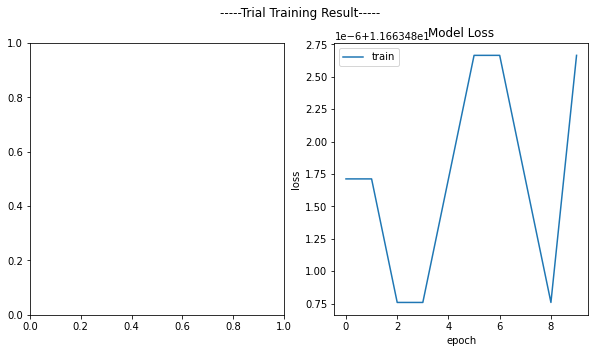

Evaluating targets...
1/1 [==============================] - 0s 108ms/step - loss: 11.6518
  Loss: 11.65181828
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073954 0.24676642 0.24838844 0.25410563]]
  LSTM entry: [[[0.25073954 0.24676642 0.24838844 0.25410563]]]
Softmax predict on new input_x
 controller_pred: [[0.25073949 0.2467668  0.24838789 0.25410578]]


 ------ Training 10 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 1.15869, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 24ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.50000 | EER_interp: 0.49040 | ACC: 0.51000
  Task  1: n_1             | EER_mean: 0.48940 | EER_interp: 0.49000 | ACC: 0.51000
  Task  2: n_2             | EER_mean: 0.44440 | EER_interp: 0.43960 | ACC: 0.56000
  Task  3: n_3             | EER_mean: 0.46940 | EER_interp: 0.45040 | ACC: 0.55000
  Task  4: n_4             | EER_mean: 0.50940 | EER_interp: 0.49940 | ACC: 0.50000
  Task  5: n_5             | EER_mean: 0.48890 | EER_interp: 0.48080 | ACC: 0.52000
  Task  6: n_6             | EER_mean: 0.53700 | EER_interp: 0.54020 | ACC: 0.46000
  Task  7: n_7             | EER_mean: 0.41070 | EER_interp: 0.39860 | ACC: 0.60000
  Task  8: n_8             | EER_mean: 0.51110 | EER_interp: 0.50100 | ACC: 0.50000
  Task  9: n_9             | EER_mean: 0.53060 | EER_interp: 0.53000 | ACC: 0.

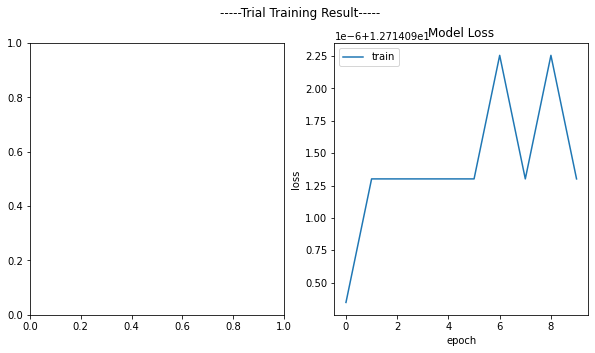

Evaluating targets...
1/1 [==============================] - 0s 101ms/step - loss: 12.7014
  Loss: 12.70137787
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073949 0.2467668  0.24838789 0.25410578]]
  LSTM entry: [[[0.25073949 0.2467668  0.24838789 0.25410578]]]
Softmax predict on new input_x
 controller_pred: [[0.25073949 0.24676663 0.24838816 0.2541057 ]]


 ------ Training 11 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.83249, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.50000 | EER_interp: 0.51040 | ACC: 0.49000
  Task  1: n_1             | EER_mean: 0.44680 | EER_interp: 0.44980 | ACC: 0.55000
  Task  2: n_2             | EER_mean: 0.54350 | EER_interp: 0.51250 | ACC: 0.49000
  Task  3: n_3             | EER_mean: 0.45100 | EER_interp: 0.45000 | ACC: 0.55000
  Task  4: n_4             | EER_mean: 0.50940 | EER_interp: 0.49940 | ACC: 0.50000
  Task  5: n_5             | EER_mean: 0.42220 | EER_interp: 0.42930 | ACC: 0.57000
  Task  6: n_6             | EER_mean: 0.57410 | EER_interp: 0.56960 | ACC: 0.43000
  Task  7: n_7             | EER_mean: 0.45450 | EER_interp: 0.45940 | ACC: 0.54000
  Task  8: n_8             | EER_mean: 0.56360 | EER_interp: 0.55960 | ACC: 0.44000
  Task  9: n_9             | EER_mean: 0.48980 | EER_interp: 0.49000 | ACC: 0.

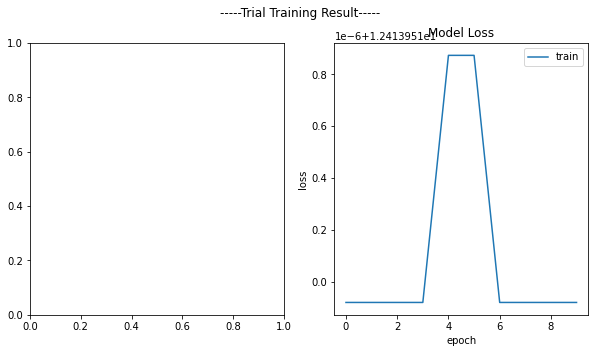

Evaluating targets...
1/1 [==============================] - 0s 109ms/step - loss: 12.4015
  Loss: 12.40153694
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073949 0.24676663 0.24838816 0.2541057 ]]
  LSTM entry: [[[0.25073949 0.24676663 0.24838816 0.2541057 ]]]
Softmax predict on new input_x
 controller_pred: [[0.25073966 0.24676476 0.24839082 0.25410476]]


 ------ Training 12 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.72875, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.47920 | EER_interp: 0.48000 | ACC: 0.52000
  Task  1: n_1             | EER_mean: 0.54720 | EER_interp: 0.53960 | ACC: 0.46000
  Task  2: n_2             | EER_mean: 0.52170 | EER_interp: 0.52010 | ACC: 0.48000
  Task  3: n_3             | EER_mean: 0.41180 | EER_interp: 0.41000 | ACC: 0.59000
  Task  4: n_4             | EER_mean: 0.57450 | EER_interp: 0.59860 | ACC: 0.40000
  Task  5: n_5             | EER_mean: 0.43640 | EER_interp: 0.42930 | ACC: 0.57000
  Task  6: n_6             | EER_mean: 0.51850 | EER_interp: 0.50920 | ACC: 0.49000
  Task  7: n_7             | EER_mean: 0.52270 | EER_interp: 0.53820 | ACC: 0.46000
  Task  8: n_8             | EER_mean: 0.55560 | EER_interp: 0.55960 | ACC: 0.44000
  Task  9: n_9             | EER_mean: 0.44900 | EER_interp: 0.44020 | ACC: 0.

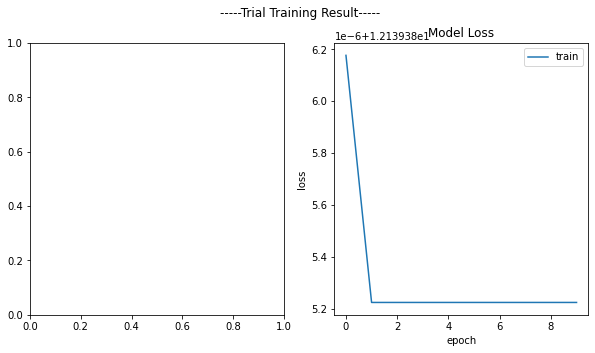

Evaluating targets...
1/1 [==============================] - 0s 99ms/step - loss: 12.1272
  Loss: 12.1272459
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073966 0.24676476 0.24839082 0.25410476]]
  LSTM entry: [[[0.25073966 0.24676476 0.24839082 0.25410476]]]
Softmax predict on new input_x
 controller_pred: [[0.2507398  0.24676287 0.24839346 0.25410384]]


 ------ Training 13 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.75837, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.51920 | EER_interp: 0.53040 | ACC: 0.47000
  Task  1: n_1             | EER_mean: 0.53190 | EER_interp: 0.54900 | ACC: 0.45000
  Task  2: n_2             | EER_mean: 0.50000 | EER_interp: 0.50920 | ACC: 0.49000
  Task  3: n_3             | EER_mean: 0.51020 | EER_interp: 0.51980 | ACC: 0.48000
  Task  4: n_4             | EER_mean: 0.57450 | EER_interp: 0.57970 | ACC: 0.42000
  Task  5: n_5             | EER_mean: 0.54550 | EER_interp: 0.55060 | ACC: 0.45000
  Task  6: n_6             | EER_mean: 0.68520 | EER_interp: 0.69040 | ACC: 0.31000
  Task  7: n_7             | EER_mean: 0.54550 | EER_interp: 0.55840 | ACC: 0.44000
  Task  8: n_8             | EER_mean: 0.51110 | EER_interp: 0.50100 | ACC: 0.50000
  Task  9: n_9             | EER_mean: 0.44900 | EER_interp: 0.44020 | ACC: 0.

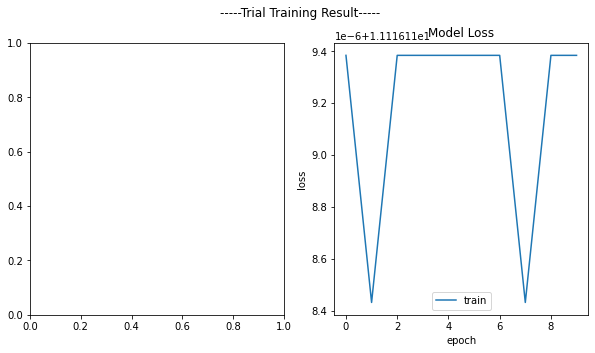

Evaluating targets...
1/1 [==============================] - 0s 96ms/step - loss: 11.1050
  Loss: 11.1050024
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.2507398  0.24676287 0.24839346 0.25410384]]
  LSTM entry: [[[0.2507398  0.24676287 0.24839346 0.25410384]]]
Softmax predict on new input_x
 controller_pred: [[0.2507398  0.24676323 0.24839292 0.25410405]]


 ------ Training 14 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.78803, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.46150 | EER_interp: 0.45990 | ACC: 0.54000
  Task  1: n_1             | EER_mean: 0.52830 | EER_interp: 0.53010 | ACC: 0.47000
  Task  2: n_2             | EER_mean: 0.55560 | EER_interp: 0.56040 | ACC: 0.44000
  Task  3: n_3             | EER_mean: 0.57140 | EER_interp: 0.57000 | ACC: 0.43000
  Task  4: n_4             | EER_mean: 0.48940 | EER_interp: 0.49000 | ACC: 0.51000
  Task  5: n_5             | EER_mean: 0.45450 | EER_interp: 0.44940 | ACC: 0.55000
  Task  6: n_6             | EER_mean: 0.50000 | EER_interp: 0.49080 | ACC: 0.51000
  Task  7: n_7             | EER_mean: 0.54550 | EER_interp: 0.56740 | ACC: 0.43000
  Task  8: n_8             | EER_mean: 0.47270 | EER_interp: 0.46970 | ACC: 0.53000
  Task  9: n_9             | EER_mean: 0.48980 | EER_interp: 0.49000 | ACC: 0.

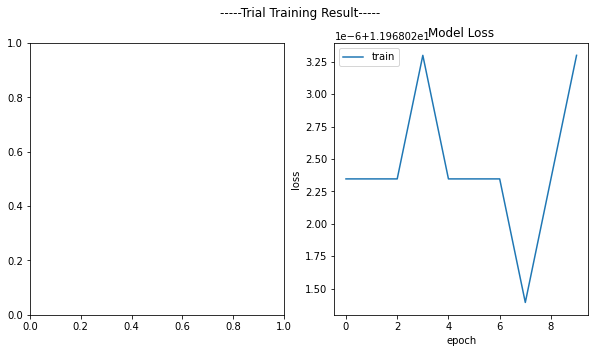

Evaluating targets...
1/1 [==============================] - 0s 99ms/step - loss: 11.9561
  Loss: 11.95605469
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.2507398  0.24676323 0.24839292 0.25410405]]
  LSTM entry: [[[0.2507398  0.24676323 0.24839292 0.25410405]]]
Softmax predict on new input_x
 controller_pred: [[0.25073978 0.24676342 0.24839264 0.25410414]]


 ------ Training 15 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 1.14047, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.43750 | EER_interp: 0.43030 | ACC: 0.57000
  Task  1: n_1             | EER_mean: 0.59570 | EER_interp: 0.59030 | ACC: 0.41000
  Task  2: n_2             | EER_mean: 0.48150 | EER_interp: 0.47990 | ACC: 0.52000
  Task  3: n_3             | EER_mean: 0.55100 | EER_interp: 0.55980 | ACC: 0.44000
  Task  4: n_4             | EER_mean: 0.53190 | EER_interp: 0.53010 | ACC: 0.47000
  Task  5: n_5             | EER_mean: 0.49090 | EER_interp: 0.48990 | ACC: 0.51000
  Task  6: n_6             | EER_mean: 0.39130 | EER_interp: 0.39010 | ACC: 0.61000
  Task  7: n_7             | EER_mean: 0.52270 | EER_interp: 0.52030 | ACC: 0.48000
  Task  8: n_8             | EER_mean: 0.45450 | EER_interp: 0.44940 | ACC: 0.55000
  Task  9: n_9             | EER_mean: 0.41180 | EER_interp: 0.41000 | ACC: 0.

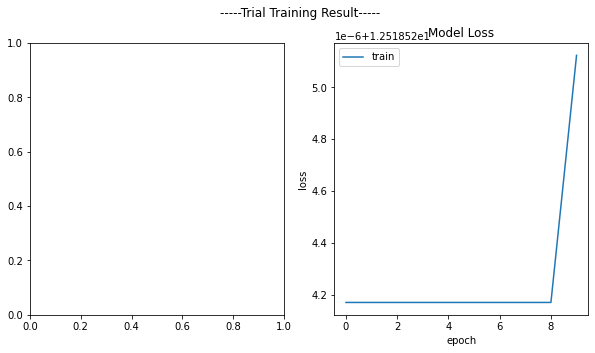

Evaluating targets...
1/1 [==============================] - 0s 102ms/step - loss: 12.5060
  Loss: 12.50600529
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073978 0.24676342 0.24839264 0.25410414]]
  LSTM entry: [[[0.25073978 0.24676342 0.24839264 0.25410414]]]
Softmax predict on new input_x
 controller_pred: [[0.2507398  0.24676304 0.24839325 0.25410393]]


 ------ Training 16 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.81268, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 24ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.50000 | EER_interp: 0.51040 | ACC: 0.49000
  Task  1: n_1             | EER_mean: 0.47170 | EER_interp: 0.46990 | ACC: 0.53000
  Task  2: n_2             | EER_mean: 0.53700 | EER_interp: 0.52940 | ACC: 0.47000
  Task  3: n_3             | EER_mean: 0.53060 | EER_interp: 0.53000 | ACC: 0.47000
  Task  4: n_4             | EER_mean: 0.46810 | EER_interp: 0.46040 | ACC: 0.54000
  Task  5: n_5             | EER_mean: 0.48890 | EER_interp: 0.48080 | ACC: 0.52000
  Task  6: n_6             | EER_mean: 0.45650 | EER_interp: 0.45040 | ACC: 0.55000
  Task  7: n_7             | EER_mean: 0.53570 | EER_interp: 0.52920 | ACC: 0.47000
  Task  8: n_8             | EER_mean: 0.53330 | EER_interp: 0.50300 | ACC: 0.50000
  Task  9: n_9             | EER_mean: 0.49020 | EER_interp: 0.49000 | ACC: 0.

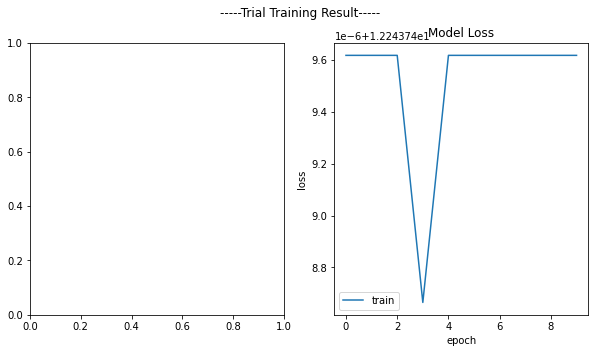

Evaluating targets...
1/1 [==============================] - 0s 102ms/step - loss: 12.2315
  Loss: 12.23150444
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.2507398  0.24676304 0.24839325 0.25410393]]
  LSTM entry: [[[0.2507398  0.24676304 0.24839325 0.25410393]]]
Softmax predict on new input_x
 controller_pred: [[0.2507398  0.24676283 0.24839349 0.2541038 ]]


 ------ Training 17 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.89553, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.54170 | EER_interp: 0.54010 | ACC: 0.46000
  Task  1: n_1             | EER_mean: 0.51060 | EER_interp: 0.51940 | ACC: 0.48000
  Task  2: n_2             | EER_mean: 0.44440 | EER_interp: 0.43960 | ACC: 0.56000
  Task  3: n_3             | EER_mean: 0.51020 | EER_interp: 0.51980 | ACC: 0.48000
  Task  4: n_4             | EER_mean: 0.43400 | EER_interp: 0.42980 | ACC: 0.57000
  Task  5: n_5             | EER_mean: 0.50910 | EER_interp: 0.51010 | ACC: 0.49000
  Task  6: n_6             | EER_mean: 0.51850 | EER_interp: 0.50920 | ACC: 0.49000
  Task  7: n_7             | EER_mean: 0.46430 | EER_interp: 0.45940 | ACC: 0.54000
  Task  8: n_8             | EER_mean: 0.51110 | EER_interp: 0.51920 | ACC: 0.48000
  Task  9: n_9             | EER_mean: 0.59180 | EER_interp: 0.59000 | ACC: 0.

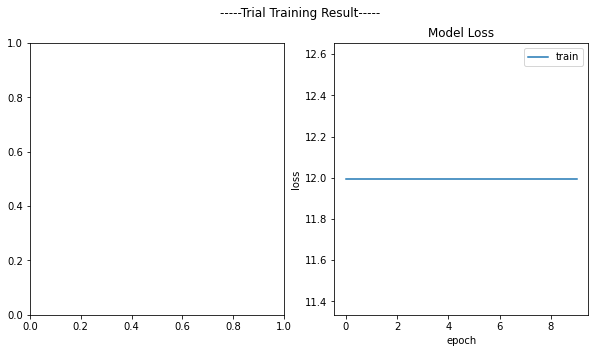

Evaluating targets...
1/1 [==============================] - 0s 103ms/step - loss: 11.9825
  Loss: 11.98250389
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.2507398  0.24676283 0.24839349 0.2541038 ]]
  LSTM entry: [[[0.2507398  0.24676283 0.24839349 0.2541038 ]]]
Softmax predict on new input_x
 controller_pred: [[0.2507398  0.24676295 0.24839336 0.25410387]]


 ------ Training 18 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.83489, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.51920 | EER_interp: 0.50960 | ACC: 0.49000
  Task  1: n_1             | EER_mean: 0.53190 | EER_interp: 0.53960 | ACC: 0.46000
  Task  2: n_2             | EER_mean: 0.54350 | EER_interp: 0.54960 | ACC: 0.45000
  Task  3: n_3             | EER_mean: 0.50980 | EER_interp: 0.49980 | ACC: 0.50000
  Task  4: n_4             | EER_mean: 0.47170 | EER_interp: 0.46990 | ACC: 0.53000
  Task  5: n_5             | EER_mean: 0.55560 | EER_interp: 0.55060 | ACC: 0.45000
  Task  6: n_6             | EER_mean: 0.50000 | EER_interp: 0.50000 | ACC: 0.50000
  Task  7: n_7             | EER_mean: 0.50000 | EER_interp: 0.53570 | ACC: 0.46000
  Task  8: n_8             | EER_mean: 0.57780 | EER_interp: 0.58890 | ACC: 0.41000
  Task  9: n_9             | EER_mean: 0.51020 | EER_interp: 0.51000 | ACC: 0.

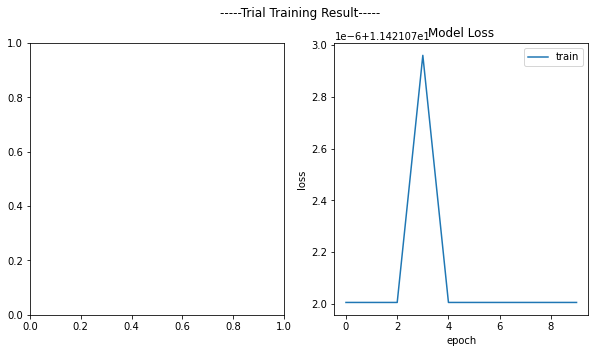

Evaluating targets...
1/1 [==============================] - 0s 99ms/step - loss: 11.4097
  Loss: 11.4096508
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.2507398  0.24676295 0.24839336 0.25410387]]
  LSTM entry: [[[0.2507398  0.24676295 0.24839336 0.25410387]]]
Softmax predict on new input_x
 controller_pred: [[0.25073987 0.24676232 0.24839428 0.25410354]]


 ------ Training 19 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.83472, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 20ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.47920 | EER_interp: 0.48000 | ACC: 0.52000
  Task  1: n_1             | EER_mean: 0.49060 | EER_interp: 0.49000 | ACC: 0.51000
  Task  2: n_2             | EER_mean: 0.46300 | EER_interp: 0.45980 | ACC: 0.54000
  Task  3: n_3             | EER_mean: 0.52940 | EER_interp: 0.53000 | ACC: 0.47000
  Task  4: n_4             | EER_mean: 0.46810 | EER_interp: 0.46040 | ACC: 0.54000
  Task  5: n_5             | EER_mean: 0.46670 | EER_interp: 0.46060 | ACC: 0.54000
  Task  6: n_6             | EER_mean: 0.47830 | EER_interp: 0.47060 | ACC: 0.53000
  Task  7: n_7             | EER_mean: 0.47730 | EER_interp: 0.47080 | ACC: 0.53000
  Task  8: n_8             | EER_mean: 0.48890 | EER_interp: 0.48080 | ACC: 0.52000
  Task  9: n_9             | EER_mean: 0.49020 | EER_interp: 0.46960 | ACC: 0.

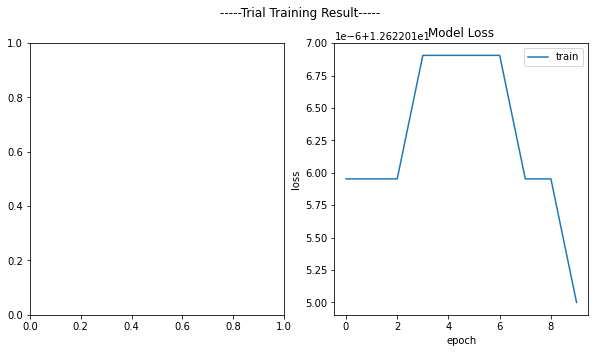

Evaluating targets...
1/1 [==============================] - 0s 98ms/step - loss: 12.6094
  Loss: 12.60939407
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073987 0.24676232 0.24839428 0.25410354]]
  LSTM entry: [[[0.25073987 0.24676232 0.24839428 0.25410354]]]
Softmax predict on new input_x
 controller_pred: [[0.25074002 0.24675989 0.24839793 0.25410214]]


 ------ Training 20 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.79676, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.38460 | EER_interp: 0.37980 | ACC: 0.62000
  Task  1: n_1             | EER_mean: 0.49060 | EER_interp: 0.49000 | ACC: 0.51000
  Task  2: n_2             | EER_mean: 0.56520 | EER_interp: 0.56960 | ACC: 0.43000
  Task  3: n_3             | EER_mean: 0.55100 | EER_interp: 0.55000 | ACC: 0.45000
  Task  4: n_4             | EER_mean: 0.55320 | EER_interp: 0.59740 | ACC: 0.40000
  Task  5: n_5             | EER_mean: 0.45450 | EER_interp: 0.44940 | ACC: 0.55000
  Task  6: n_6             | EER_mean: 0.59260 | EER_interp: 0.57890 | ACC: 0.42000
  Task  7: n_7             | EER_mean: 0.53570 | EER_interp: 0.51780 | ACC: 0.48000
  Task  8: n_8             | EER_mean: 0.48890 | EER_interp: 0.48990 | ACC: 0.51000
  Task  9: n_9             | EER_mean: 0.47060 | EER_interp: 0.47000 | ACC: 0.

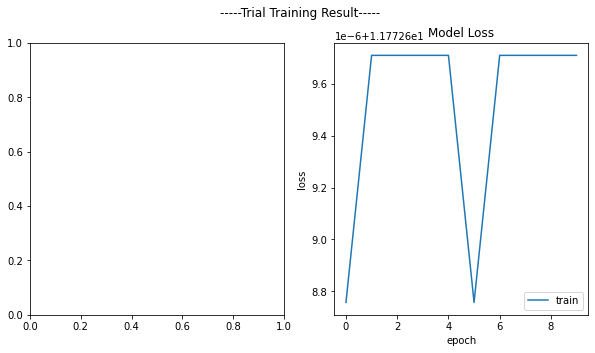

Evaluating targets...
1/1 [==============================] - 0s 99ms/step - loss: 11.7608
  Loss: 11.76083755
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25074002 0.24675989 0.24839793 0.25410214]]
  LSTM entry: [[[0.25074002 0.24675989 0.24839793 0.25410214]]]
Softmax predict on new input_x
 controller_pred: [[0.25074005 0.24675997 0.24839777 0.25410223]]


 ------ Training 21 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.92199, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 24ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.48080 | EER_interp: 0.48000 | ACC: 0.52000
  Task  1: n_1             | EER_mean: 0.49060 | EER_interp: 0.49000 | ACC: 0.51000
  Task  2: n_2             | EER_mean: 0.47830 | EER_interp: 0.47060 | ACC: 0.53000
  Task  3: n_3             | EER_mean: 0.49020 | EER_interp: 0.49000 | ACC: 0.51000
  Task  4: n_4             | EER_mean: 0.41510 | EER_interp: 0.40970 | ACC: 0.59000
  Task  5: n_5             | EER_mean: 0.46670 | EER_interp: 0.46970 | ACC: 0.53000
  Task  6: n_6             | EER_mean: 0.59260 | EER_interp: 0.61150 | ACC: 0.39000
  Task  7: n_7             | EER_mean: 0.50000 | EER_interp: 0.52680 | ACC: 0.47000
  Task  8: n_8             | EER_mean: 0.46670 | EER_interp: 0.46970 | ACC: 0.53000
  Task  9: n_9             | EER_mean: 0.36730 | EER_interp: 0.36010 | ACC: 0.

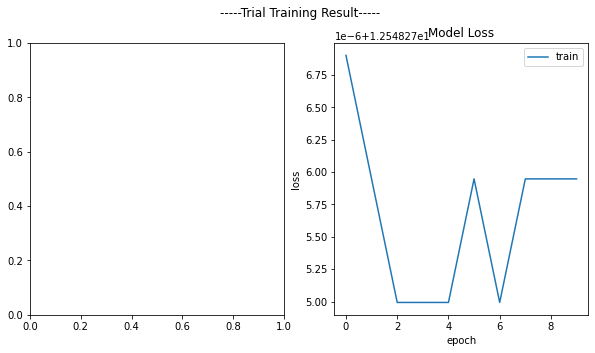

Evaluating targets...
1/1 [==============================] - 0s 100ms/step - loss: 12.5357
  Loss: 12.53572845
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25074005 0.24675997 0.24839777 0.25410223]]
  LSTM entry: [[[0.25074005 0.24675997 0.24839777 0.25410223]]]
Softmax predict on new input_x
 controller_pred: [[0.25073996 0.24676184 0.24839477 0.2541034 ]]


 ------ Training 22 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.85443, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 24ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.57690 | EER_interp: 0.56970 | ACC: 0.43000
  Task  1: n_1             | EER_mean: 0.36170 | EER_interp: 0.34120 | ACC: 0.66000
  Task  2: n_2             | EER_mean: 0.54350 | EER_interp: 0.54960 | ACC: 0.45000
  Task  3: n_3             | EER_mean: 0.47060 | EER_interp: 0.47000 | ACC: 0.53000
  Task  4: n_4             | EER_mean: 0.38300 | EER_interp: 0.37080 | ACC: 0.63000
  Task  5: n_5             | EER_mean: 0.55560 | EER_interp: 0.55960 | ACC: 0.44000
  Task  6: n_6             | EER_mean: 0.36960 | EER_interp: 0.36080 | ACC: 0.64000
  Task  7: n_7             | EER_mean: 0.42860 | EER_interp: 0.43020 | ACC: 0.57000
  Task  8: n_8             | EER_mean: 0.43640 | EER_interp: 0.42930 | ACC: 0.57000
  Task  9: n_9             | EER_mean: 0.48980 | EER_interp: 0.48020 | ACC: 0.

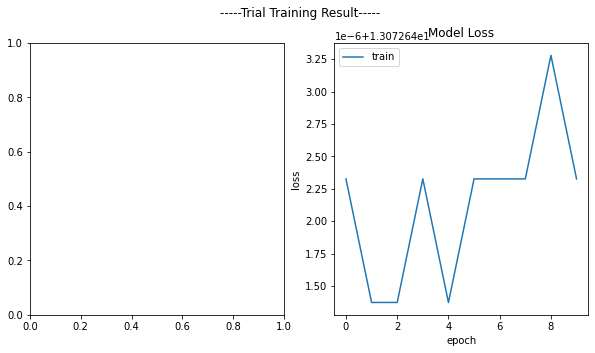

Evaluating targets...
1/1 [==============================] - 0s 117ms/step - loss: 13.0596
  Loss: 13.05956936
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073996 0.24676184 0.24839477 0.2541034 ]]
  LSTM entry: [[[0.25073996 0.24676184 0.24839477 0.2541034 ]]]
Softmax predict on new input_x
 controller_pred: [[0.25073978 0.24676517 0.24838948 0.25410557]]


 ------ Training 23 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.78929, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.52080 | EER_interp: 0.52000 | ACC: 0.48000
  Task  1: n_1             | EER_mean: 0.41510 | EER_interp: 0.40970 | ACC: 0.59000
  Task  2: n_2             | EER_mean: 0.53700 | EER_interp: 0.52940 | ACC: 0.47000
  Task  3: n_3             | EER_mean: 0.58820 | EER_interp: 0.57980 | ACC: 0.42000
  Task  4: n_4             | EER_mean: 0.42550 | EER_interp: 0.42980 | ACC: 0.57000
  Task  5: n_5             | EER_mean: 0.60000 | EER_interp: 0.60000 | ACC: 0.40000
  Task  6: n_6             | EER_mean: 0.43480 | EER_interp: 0.43040 | ACC: 0.57000
  Task  7: n_7             | EER_mean: 0.45450 | EER_interp: 0.45940 | ACC: 0.54000
  Task  8: n_8             | EER_mean: 0.55560 | EER_interp: 0.55960 | ACC: 0.44000
  Task  9: n_9             | EER_mean: 0.51020 | EER_interp: 0.50020 | ACC: 0.

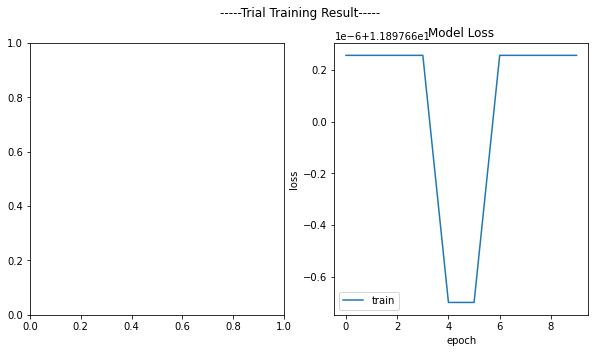

Evaluating targets...
1/1 [==============================] - 0s 99ms/step - loss: 11.8858
  Loss: 11.88576317
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073978 0.24676517 0.24838948 0.25410557]]
  LSTM entry: [[[0.25073978 0.24676517 0.24838948 0.25410557]]]
Softmax predict on new input_x
 controller_pred: [[0.25073966 0.24676724 0.2483862  0.2541069 ]]


 ------ Training 24 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 1.00199, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.55770 | EER_interp: 0.56010 | ACC: 0.44000
  Task  1: n_1             | EER_mean: 0.53190 | EER_interp: 0.53010 | ACC: 0.47000
  Task  2: n_2             | EER_mean: 0.48150 | EER_interp: 0.47990 | ACC: 0.52000
  Task  3: n_3             | EER_mean: 0.55100 | EER_interp: 0.55000 | ACC: 0.45000
  Task  4: n_4             | EER_mean: 0.46810 | EER_interp: 0.47940 | ACC: 0.52000
  Task  5: n_5             | EER_mean: 0.44440 | EER_interp: 0.44040 | ACC: 0.56000
  Task  6: n_6             | EER_mean: 0.60870 | EER_interp: 0.60060 | ACC: 0.40000
  Task  7: n_7             | EER_mean: 0.46430 | EER_interp: 0.45940 | ACC: 0.54000
  Task  8: n_8             | EER_mean: 0.57780 | EER_interp: 0.56160 | ACC: 0.44000
  Task  9: n_9             | EER_mean: 0.40820 | EER_interp: 0.40020 | ACC: 0.

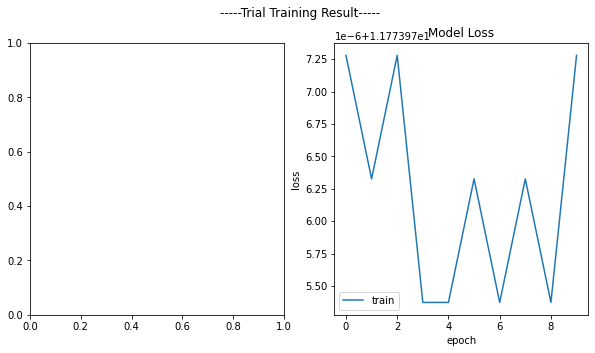

Evaluating targets...
1/1 [==============================] - 0s 102ms/step - loss: 11.7622
  Loss: 11.76220322
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073966 0.24676724 0.2483862  0.2541069 ]]
  LSTM entry: [[[0.25073966 0.24676724 0.2483862  0.2541069 ]]]
Softmax predict on new input_x
 controller_pred: [[0.25073957 0.2467687  0.24838378 0.25410792]]


 ------ Training 25 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.84031, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.46150 | EER_interp: 0.43910 | ACC: 0.56000
  Task  1: n_1             | EER_mean: 0.47170 | EER_interp: 0.46990 | ACC: 0.53000
  Task  2: n_2             | EER_mean: 0.48150 | EER_interp: 0.47990 | ACC: 0.52000
  Task  3: n_3             | EER_mean: 0.48980 | EER_interp: 0.49980 | ACC: 0.50000
  Task  4: n_4             | EER_mean: 0.44680 | EER_interp: 0.43100 | ACC: 0.57000
  Task  5: n_5             | EER_mean: 0.51110 | EER_interp: 0.51010 | ACC: 0.49000
  Task  6: n_6             | EER_mean: 0.47830 | EER_interp: 0.47060 | ACC: 0.53000
  Task  7: n_7             | EER_mean: 0.55360 | EER_interp: 0.56090 | ACC: 0.44000
  Task  8: n_8             | EER_mean: 0.43640 | EER_interp: 0.44040 | ACC: 0.56000
  Task  9: n_9             | EER_mean: 0.47060 | EER_interp: 0.47000 | ACC: 0.

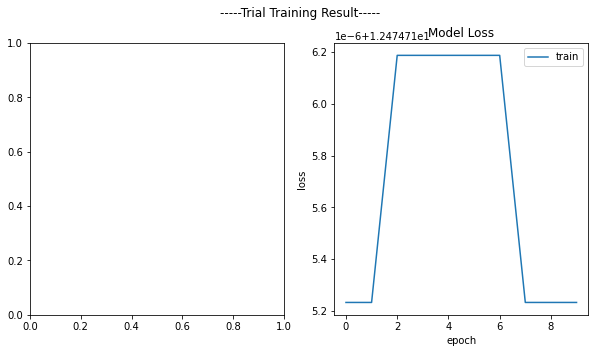

Evaluating targets...
1/1 [==============================] - 0s 110ms/step - loss: 12.4622
  Loss: 12.46224117
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073957 0.2467687  0.24838378 0.25410792]]
  LSTM entry: [[[0.25073957 0.2467687  0.24838378 0.25410792]]]
Softmax predict on new input_x
 controller_pred: [[0.25073963 0.246767   0.24838677 0.25410664]]


 ------ Training 26 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.81409, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.47920 | EER_interp: 0.47040 | ACC: 0.53000
  Task  1: n_1             | EER_mean: 0.46810 | EER_interp: 0.46990 | ACC: 0.53000
  Task  2: n_2             | EER_mean: 0.59260 | EER_interp: 0.58980 | ACC: 0.41000
  Task  3: n_3             | EER_mean: 0.57140 | EER_interp: 0.57980 | ACC: 0.42000
  Task  4: n_4             | EER_mean: 0.46810 | EER_interp: 0.46990 | ACC: 0.53000
  Task  5: n_5             | EER_mean: 0.42220 | EER_interp: 0.41110 | ACC: 0.59000
  Task  6: n_6             | EER_mean: 0.50000 | EER_interp: 0.48920 | ACC: 0.51000
  Task  7: n_7             | EER_mean: 0.56820 | EER_interp: 0.56980 | ACC: 0.43000
  Task  8: n_8             | EER_mean: 0.48890 | EER_interp: 0.48080 | ACC: 0.52000
  Task  9: n_9             | EER_mean: 0.52940 | EER_interp: 0.50960 | ACC: 0.

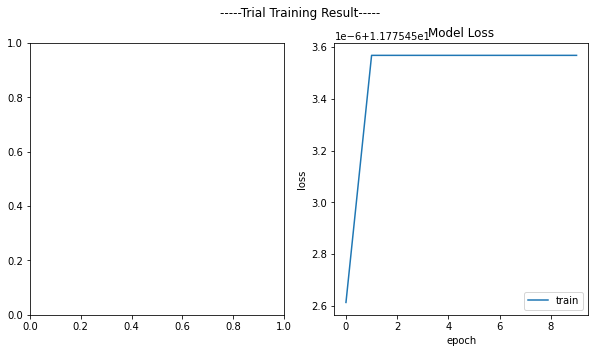

Evaluating targets...
1/1 [==============================] - 0s 101ms/step - loss: 11.7637
  Loss: 11.76367855
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073963 0.246767   0.24838677 0.25410664]]
  LSTM entry: [[[0.25073963 0.246767   0.24838677 0.25410664]]]
Softmax predict on new input_x
 controller_pred: [[0.25073963 0.24676603 0.24838838 0.25410593]]


 ------ Training 27 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 1.14232, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 20ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.46150 | EER_interp: 0.45990 | ACC: 0.54000
  Task  1: n_1             | EER_mean: 0.59570 | EER_interp: 0.60920 | ACC: 0.39000
  Task  2: n_2             | EER_mean: 0.50000 | EER_interp: 0.50920 | ACC: 0.49000
  Task  3: n_3             | EER_mean: 0.46940 | EER_interp: 0.47000 | ACC: 0.53000
  Task  4: n_4             | EER_mean: 0.53190 | EER_interp: 0.53010 | ACC: 0.47000
  Task  5: n_5             | EER_mean: 0.51110 | EER_interp: 0.51010 | ACC: 0.49000
  Task  6: n_6             | EER_mean: 0.47830 | EER_interp: 0.46140 | ACC: 0.54000
  Task  7: n_7             | EER_mean: 0.47730 | EER_interp: 0.46180 | ACC: 0.54000
  Task  8: n_8             | EER_mean: 0.57780 | EER_interp: 0.57980 | ACC: 0.42000
  Task  9: n_9             | EER_mean: 0.48980 | EER_interp: 0.48020 | ACC: 0.

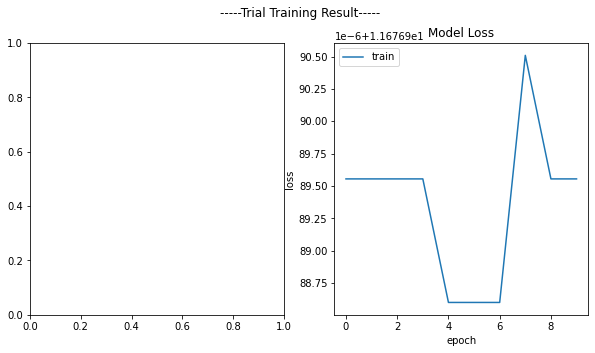

Evaluating targets...
1/1 [==============================] - 0s 100ms/step - loss: 11.6653
  Loss: 11.66531372
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073963 0.24676603 0.24838838 0.25410593]]
  LSTM entry: [[[0.25073963 0.24676603 0.24838838 0.25410593]]]
Softmax predict on new input_x
 controller_pred: [[0.25073963 0.24676684 0.24838695 0.25410655]]


 ------ Training 28 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.83877, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 20ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.59620 | EER_interp: 0.61060 | ACC: 0.39000
  Task  1: n_1             | EER_mean: 0.56600 | EER_interp: 0.55960 | ACC: 0.44000
  Task  2: n_2             | EER_mean: 0.50000 | EER_interp: 0.50000 | ACC: 0.50000
  Task  3: n_3             | EER_mean: 0.57140 | EER_interp: 0.57000 | ACC: 0.43000
  Task  4: n_4             | EER_mean: 0.54720 | EER_interp: 0.53960 | ACC: 0.46000
  Task  5: n_5             | EER_mean: 0.48890 | EER_interp: 0.48080 | ACC: 0.52000
  Task  6: n_6             | EER_mean: 0.50000 | EER_interp: 0.53260 | ACC: 0.47000
  Task  7: n_7             | EER_mean: 0.46430 | EER_interp: 0.45940 | ACC: 0.54000
  Task  8: n_8             | EER_mean: 0.44440 | EER_interp: 0.43130 | ACC: 0.57000
  Task  9: n_9             | EER_mean: 0.55100 | EER_interp: 0.54020 | ACC: 0.

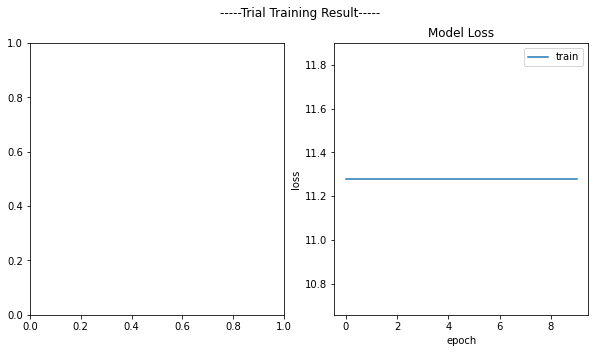

Evaluating targets...
1/1 [==============================] - 0s 104ms/step - loss: 11.2677
  Loss: 11.26774216
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073963 0.24676684 0.24838695 0.25410655]]
  LSTM entry: [[[0.25073963 0.24676684 0.24838695 0.25410655]]]
Softmax predict on new input_x
 controller_pred: [[0.25073963 0.24676755 0.24838573 0.2541071 ]]


 ------ Training 29 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.85070, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.47920 | EER_interp: 0.47040 | ACC: 0.53000
  Task  1: n_1             | EER_mean: 0.55320 | EER_interp: 0.55020 | ACC: 0.45000
  Task  2: n_2             | EER_mean: 0.47830 | EER_interp: 0.47990 | ACC: 0.52000
  Task  3: n_3             | EER_mean: 0.48980 | EER_interp: 0.49000 | ACC: 0.51000
  Task  4: n_4             | EER_mean: 0.48940 | EER_interp: 0.49000 | ACC: 0.51000
  Task  5: n_5             | EER_mean: 0.51110 | EER_interp: 0.51010 | ACC: 0.49000
  Task  6: n_6             | EER_mean: 0.42590 | EER_interp: 0.43040 | ACC: 0.57000
  Task  7: n_7             | EER_mean: 0.50000 | EER_interp: 0.53570 | ACC: 0.46000
  Task  8: n_8             | EER_mean: 0.47270 | EER_interp: 0.46970 | ACC: 0.53000
  Task  9: n_9             | EER_mean: 0.48980 | EER_interp: 0.48020 | ACC: 0.

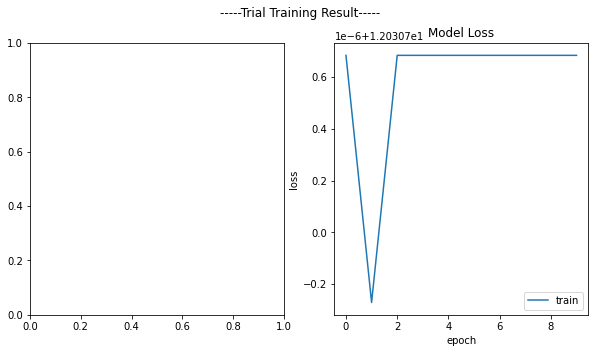

Evaluating targets...
1/1 [==============================] - 0s 99ms/step - loss: 12.0187
  Loss: 12.01867008
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073963 0.24676755 0.24838573 0.2541071 ]]
  LSTM entry: [[[0.25073963 0.24676755 0.24838573 0.2541071 ]]]
Softmax predict on new input_x
 controller_pred: [[0.2507396  0.24676853 0.248384   0.25410786]]


 ------ Training 30 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.76345, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.50000 | EER_interp: 0.50000 | ACC: 0.50000
  Task  1: n_1             | EER_mean: 0.47170 | EER_interp: 0.46990 | ACC: 0.53000
  Task  2: n_2             | EER_mean: 0.48150 | EER_interp: 0.47990 | ACC: 0.52000
  Task  3: n_3             | EER_mean: 0.52940 | EER_interp: 0.51980 | ACC: 0.48000
  Task  4: n_4             | EER_mean: 0.44680 | EER_interp: 0.44040 | ACC: 0.56000
  Task  5: n_5             | EER_mean: 0.48890 | EER_interp: 0.48990 | ACC: 0.51000
  Task  6: n_6             | EER_mean: 0.51850 | EER_interp: 0.53100 | ACC: 0.47000
  Task  7: n_7             | EER_mean: 0.51790 | EER_interp: 0.50900 | ACC: 0.49000
  Task  8: n_8             | EER_mean: 0.54550 | EER_interp: 0.53940 | ACC: 0.46000
  Task  9: n_9             | EER_mean: 0.52940 | EER_interp: 0.55040 | ACC: 0.

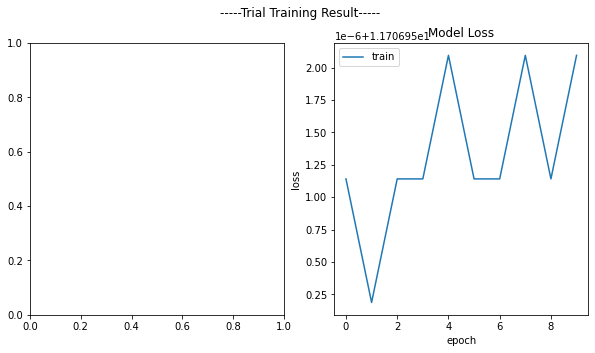

Evaluating targets...
1/1 [==============================] - 0s 103ms/step - loss: 11.6952
  Loss: 11.69524384
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.2507396  0.24676853 0.248384   0.25410786]]
  LSTM entry: [[[0.2507396  0.24676853 0.248384   0.25410786]]]
Softmax predict on new input_x
 controller_pred: [[0.2507396  0.24676867 0.2483838  0.25410795]]


 ------ Training 31 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.74730, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.51920 | EER_interp: 0.52000 | ACC: 0.48000
  Task  1: n_1             | EER_mean: 0.50940 | EER_interp: 0.49940 | ACC: 0.50000
  Task  2: n_2             | EER_mean: 0.45650 | EER_interp: 0.45040 | ACC: 0.55000
  Task  3: n_3             | EER_mean: 0.47060 | EER_interp: 0.47000 | ACC: 0.53000
  Task  4: n_4             | EER_mean: 0.46810 | EER_interp: 0.46040 | ACC: 0.54000
  Task  5: n_5             | EER_mean: 0.46670 | EER_interp: 0.46970 | ACC: 0.53000
  Task  6: n_6             | EER_mean: 0.45650 | EER_interp: 0.45040 | ACC: 0.55000
  Task  7: n_7             | EER_mean: 0.50000 | EER_interp: 0.48860 | ACC: 0.51000
  Task  8: n_8             | EER_mean: 0.55560 | EER_interp: 0.55060 | ACC: 0.45000
  Task  9: n_9             | EER_mean: 0.45100 | EER_interp: 0.46020 | ACC: 0.

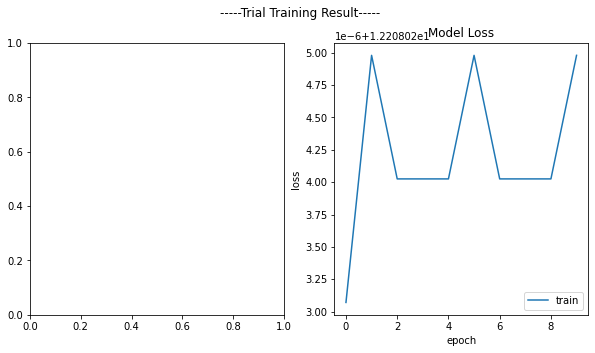

Evaluating targets...
1/1 [==============================] - 0s 105ms/step - loss: 12.1958
  Loss: 12.19581604
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.2507396  0.24676867 0.2483838  0.25410795]]
  LSTM entry: [[[0.2507396  0.24676867 0.2483838  0.25410795]]]
Softmax predict on new input_x
 controller_pred: [[0.2507396  0.24676685 0.24838708 0.25410646]]


 ------ Training 32 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.75600, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.46150 | EER_interp: 0.43910 | ACC: 0.56000
  Task  1: n_1             | EER_mean: 0.50940 | EER_interp: 0.49940 | ACC: 0.50000
  Task  2: n_2             | EER_mean: 0.53700 | EER_interp: 0.52940 | ACC: 0.47000
  Task  3: n_3             | EER_mean: 0.57140 | EER_interp: 0.57000 | ACC: 0.43000
  Task  4: n_4             | EER_mean: 0.54720 | EER_interp: 0.53960 | ACC: 0.46000
  Task  5: n_5             | EER_mean: 0.49090 | EER_interp: 0.50100 | ACC: 0.50000
  Task  6: n_6             | EER_mean: 0.60870 | EER_interp: 0.60990 | ACC: 0.39000
  Task  7: n_7             | EER_mean: 0.47730 | EER_interp: 0.47080 | ACC: 0.53000
  Task  8: n_8             | EER_mean: 0.46670 | EER_interp: 0.46970 | ACC: 0.53000
  Task  9: n_9             | EER_mean: 0.47060 | EER_interp: 0.45980 | ACC: 0.

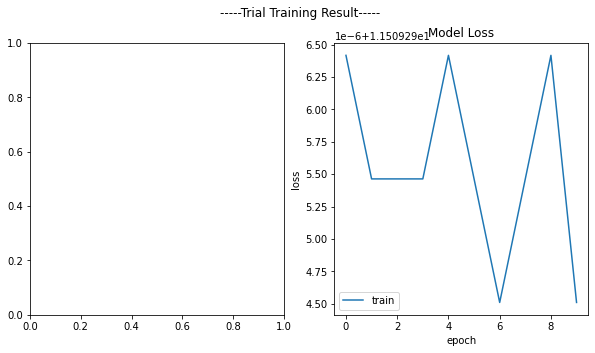

Evaluating targets...
1/1 [==============================] - 0s 99ms/step - loss: 11.4978
  Loss: 11.49778557
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.2507396  0.24676685 0.24838708 0.25410646]]
  LSTM entry: [[[0.2507396  0.24676685 0.24838708 0.25410646]]]
Softmax predict on new input_x
 controller_pred: [[0.25073963 0.2467642  0.24839191 0.25410426]]


 ------ Training 33 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.89183, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.47920 | EER_interp: 0.47040 | ACC: 0.53000
  Task  1: n_1             | EER_mean: 0.56600 | EER_interp: 0.55960 | ACC: 0.44000
  Task  2: n_2             | EER_mean: 0.39130 | EER_interp: 0.39010 | ACC: 0.61000
  Task  3: n_3             | EER_mean: 0.47060 | EER_interp: 0.47000 | ACC: 0.53000
  Task  4: n_4             | EER_mean: 0.54720 | EER_interp: 0.53960 | ACC: 0.46000
  Task  5: n_5             | EER_mean: 0.55560 | EER_interp: 0.55060 | ACC: 0.45000
  Task  6: n_6             | EER_mean: 0.39130 | EER_interp: 0.39010 | ACC: 0.61000
  Task  7: n_7             | EER_mean: 0.52270 | EER_interp: 0.52030 | ACC: 0.48000
  Task  8: n_8             | EER_mean: 0.57780 | EER_interp: 0.57980 | ACC: 0.42000
  Task  9: n_9             | EER_mean: 0.51020 | EER_interp: 0.51000 | ACC: 0.

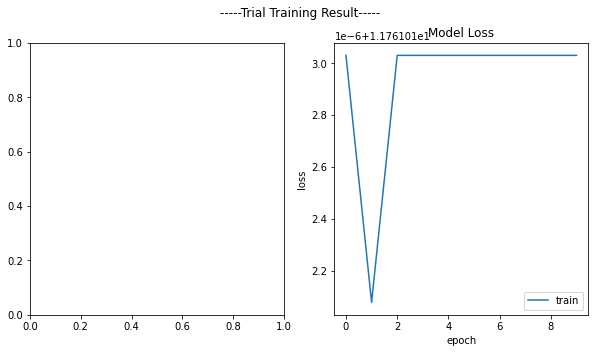

Evaluating targets...
1/1 [==============================] - 0s 102ms/step - loss: 11.7493
  Loss: 11.74925232
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073963 0.2467642  0.24839191 0.25410426]]
  LSTM entry: [[[0.25073963 0.2467642  0.24839191 0.25410426]]]
Softmax predict on new input_x
 controller_pred: [[0.25073966 0.24676423 0.24839173 0.25410432]]


 ------ Training 34 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.80516, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 20ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.43750 | EER_interp: 0.43030 | ACC: 0.57000
  Task  1: n_1             | EER_mean: 0.45280 | EER_interp: 0.44980 | ACC: 0.55000
  Task  2: n_2             | EER_mean: 0.50000 | EER_interp: 0.51850 | ACC: 0.48000
  Task  3: n_3             | EER_mean: 0.51020 | EER_interp: 0.50020 | ACC: 0.50000
  Task  4: n_4             | EER_mean: 0.44680 | EER_interp: 0.44980 | ACC: 0.55000
  Task  5: n_5             | EER_mean: 0.41820 | EER_interp: 0.42020 | ACC: 0.58000
  Task  6: n_6             | EER_mean: 0.55560 | EER_interp: 0.54960 | ACC: 0.45000
  Task  7: n_7             | EER_mean: 0.48210 | EER_interp: 0.47970 | ACC: 0.52000
  Task  8: n_8             | EER_mean: 0.60000 | EER_interp: 0.60000 | ACC: 0.40000
  Task  9: n_9             | EER_mean: 0.49020 | EER_interp: 0.49000 | ACC: 0.

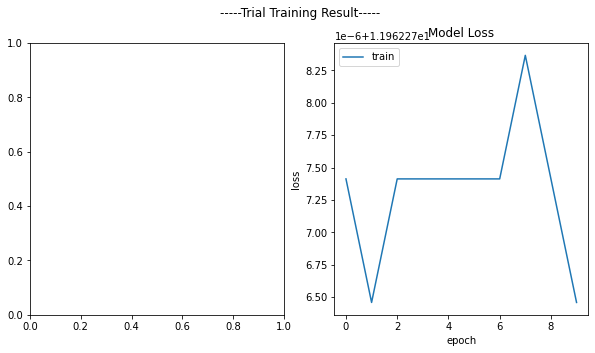

Evaluating targets...
1/1 [==============================] - 0s 97ms/step - loss: 11.9503
  Loss: 11.95031548
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073966 0.24676423 0.24839173 0.25410432]]
  LSTM entry: [[[0.25073966 0.24676423 0.24839173 0.25410432]]]
Softmax predict on new input_x
 controller_pred: [[0.2507397  0.24676484 0.24839064 0.25410485]]


 ------ Training 35 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.72489, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 20ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.57690 | EER_interp: 0.58010 | ACC: 0.42000
  Task  1: n_1             | EER_mean: 0.55320 | EER_interp: 0.55020 | ACC: 0.45000
  Task  2: n_2             | EER_mean: 0.42590 | EER_interp: 0.43040 | ACC: 0.57000
  Task  3: n_3             | EER_mean: 0.48980 | EER_interp: 0.49000 | ACC: 0.51000
  Task  4: n_4             | EER_mean: 0.44680 | EER_interp: 0.44040 | ACC: 0.56000
  Task  5: n_5             | EER_mean: 0.50910 | EER_interp: 0.51010 | ACC: 0.49000
  Task  6: n_6             | EER_mean: 0.57410 | EER_interp: 0.56960 | ACC: 0.43000
  Task  7: n_7             | EER_mean: 0.47730 | EER_interp: 0.47970 | ACC: 0.52000
  Task  8: n_8             | EER_mean: 0.54550 | EER_interp: 0.53940 | ACC: 0.46000
  Task  9: n_9             | EER_mean: 0.46940 | EER_interp: 0.46020 | ACC: 0.

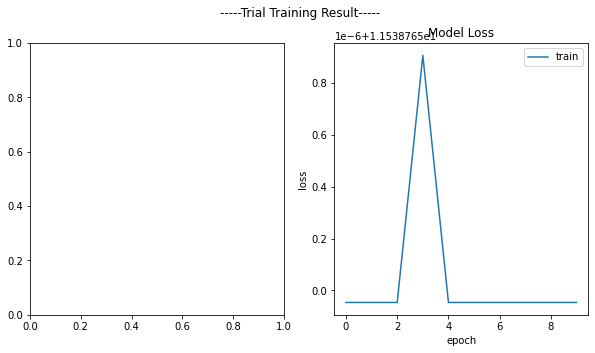

Evaluating targets...
1/1 [==============================] - 0s 98ms/step - loss: 11.5272
  Loss: 11.52722645
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.2507397  0.24676484 0.24839064 0.25410485]]
  LSTM entry: [[[0.2507397  0.24676484 0.24839064 0.25410485]]]
Softmax predict on new input_x
 controller_pred: [[0.25073966 0.24676467 0.24839096 0.2541047 ]]


 ------ Training 36 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.78339, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.52080 | EER_interp: 0.52000 | ACC: 0.48000
  Task  1: n_1             | EER_mean: 0.44680 | EER_interp: 0.44980 | ACC: 0.55000
  Task  2: n_2             | EER_mean: 0.48150 | EER_interp: 0.47990 | ACC: 0.52000
  Task  3: n_3             | EER_mean: 0.54900 | EER_interp: 0.53980 | ACC: 0.46000
  Task  4: n_4             | EER_mean: 0.41510 | EER_interp: 0.42030 | ACC: 0.58000
  Task  5: n_5             | EER_mean: 0.51110 | EER_interp: 0.51920 | ACC: 0.48000
  Task  6: n_6             | EER_mean: 0.50000 | EER_interp: 0.50000 | ACC: 0.50000
  Task  7: n_7             | EER_mean: 0.56820 | EER_interp: 0.56980 | ACC: 0.43000
  Task  8: n_8             | EER_mean: 0.50910 | EER_interp: 0.51010 | ACC: 0.49000
  Task  9: n_9             | EER_mean: 0.54900 | EER_interp: 0.55000 | ACC: 0.

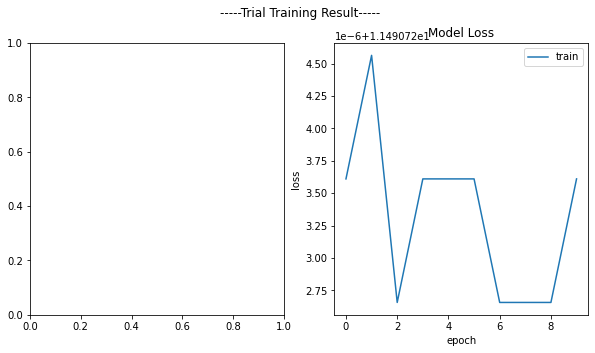

Evaluating targets...
1/1 [==============================] - 0s 99ms/step - loss: 11.4792
  Loss: 11.47923279
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073966 0.24676467 0.24839096 0.2541047 ]]
  LSTM entry: [[[0.25073966 0.24676467 0.24839096 0.2541047 ]]]
Softmax predict on new input_x
 controller_pred: [[0.25073966 0.24676536 0.24838966 0.25410533]]


 ------ Training 37 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 1.20473, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 25ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.44230 | EER_interp: 0.42950 | ACC: 0.57000
  Task  1: n_1             | EER_mean: 0.52830 | EER_interp: 0.53010 | ACC: 0.47000
  Task  2: n_2             | EER_mean: 0.47830 | EER_interp: 0.47990 | ACC: 0.52000
  Task  3: n_3             | EER_mean: 0.52940 | EER_interp: 0.53000 | ACC: 0.47000
  Task  4: n_4             | EER_mean: 0.52830 | EER_interp: 0.53010 | ACC: 0.47000
  Task  5: n_5             | EER_mean: 0.51110 | EER_interp: 0.51010 | ACC: 0.49000
  Task  6: n_6             | EER_mean: 0.47830 | EER_interp: 0.47060 | ACC: 0.53000
  Task  7: n_7             | EER_mean: 0.43180 | EER_interp: 0.42120 | ACC: 0.58000
  Task  8: n_8             | EER_mean: 0.57780 | EER_interp: 0.57070 | ACC: 0.43000
  Task  9: n_9             | EER_mean: 0.49020 | EER_interp: 0.49000 | ACC: 0.

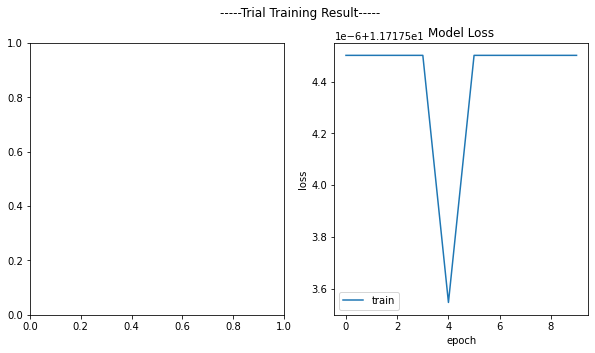

Evaluating targets...
1/1 [==============================] - 0s 97ms/step - loss: 11.7058
  Loss: 11.70578671
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073966 0.24676536 0.24838966 0.25410533]]
  LSTM entry: [[[0.25073966 0.24676536 0.24838966 0.25410533]]]
Softmax predict on new input_x
 controller_pred: [[0.2507397  0.24676755 0.2483855  0.2541073 ]]


 ------ Training 38 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.81120, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.51920 | EER_interp: 0.52000 | ACC: 0.48000
  Task  1: n_1             | EER_mean: 0.52830 | EER_interp: 0.51940 | ACC: 0.48000
  Task  2: n_2             | EER_mean: 0.57410 | EER_interp: 0.56960 | ACC: 0.43000
  Task  3: n_3             | EER_mean: 0.40820 | EER_interp: 0.41000 | ACC: 0.59000
  Task  4: n_4             | EER_mean: 0.51060 | EER_interp: 0.50060 | ACC: 0.50000
  Task  5: n_5             | EER_mean: 0.49090 | EER_interp: 0.47880 | ACC: 0.52000
  Task  6: n_6             | EER_mean: 0.62960 | EER_interp: 0.63000 | ACC: 0.37000
  Task  7: n_7             | EER_mean: 0.48210 | EER_interp: 0.47970 | ACC: 0.52000
  Task  8: n_8             | EER_mean: 0.41820 | EER_interp: 0.40910 | ACC: 0.59000
  Task  9: n_9             | EER_mean: 0.43140 | EER_interp: 0.43000 | ACC: 0.

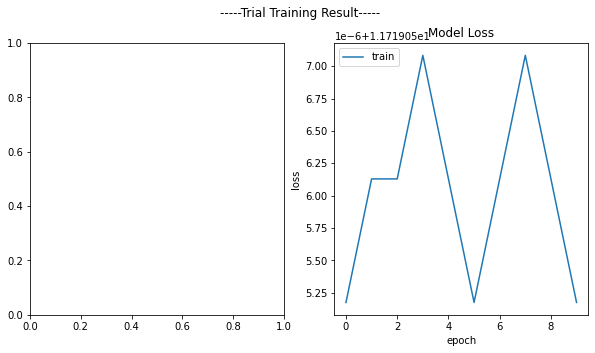

Evaluating targets...
1/1 [==============================] - 0s 98ms/step - loss: 11.7073
  Loss: 11.70733643
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.2507397  0.24676755 0.2483855  0.2541073 ]]
  LSTM entry: [[[0.2507397  0.24676755 0.2483855  0.2541073 ]]]
Softmax predict on new input_x
 controller_pred: [[0.2507397  0.24676897 0.24838282 0.25410855]]


 ------ Training 39 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.86605, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.52080 | EER_interp: 0.52000 | ACC: 0.48000
  Task  1: n_1             | EER_mean: 0.47170 | EER_interp: 0.46990 | ACC: 0.53000
  Task  2: n_2             | EER_mean: 0.46300 | EER_interp: 0.45980 | ACC: 0.54000
  Task  3: n_3             | EER_mean: 0.46940 | EER_interp: 0.47000 | ACC: 0.53000
  Task  4: n_4             | EER_mean: 0.51060 | EER_interp: 0.50060 | ACC: 0.50000
  Task  5: n_5             | EER_mean: 0.53330 | EER_interp: 0.53030 | ACC: 0.47000
  Task  6: n_6             | EER_mean: 0.57410 | EER_interp: 0.58060 | ACC: 0.42000
  Task  7: n_7             | EER_mean: 0.50000 | EER_interp: 0.48860 | ACC: 0.51000
  Task  8: n_8             | EER_mean: 0.50910 | EER_interp: 0.51010 | ACC: 0.49000
  Task  9: n_9             | EER_mean: 0.51020 | EER_interp: 0.51000 | ACC: 0.

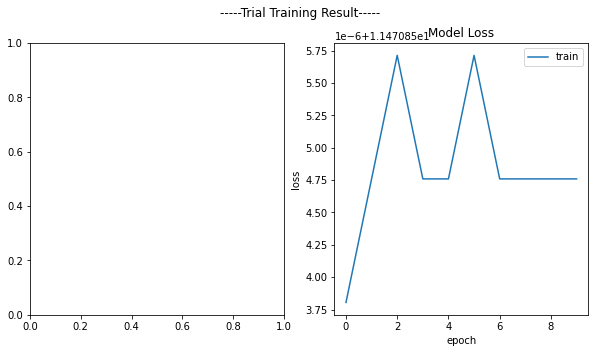

Evaluating targets...
1/1 [==============================] - 0s 102ms/step - loss: 11.4594
  Loss: 11.45938301
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.2507397  0.24676897 0.24838282 0.25410855]]
  LSTM entry: [[[0.2507397  0.24676897 0.24838282 0.25410855]]]
Softmax predict on new input_x
 controller_pred: [[0.25073966 0.2467694  0.24838202 0.25410894]]


 ------ Training 40 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.91581, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.58330 | EER_interp: 0.58010 | ACC: 0.42000
  Task  1: n_1             | EER_mean: 0.60380 | EER_interp: 0.58920 | ACC: 0.41000
  Task  2: n_2             | EER_mean: 0.50000 | EER_interp: 0.50000 | ACC: 0.50000
  Task  3: n_3             | EER_mean: 0.43140 | EER_interp: 0.43000 | ACC: 0.57000
  Task  4: n_4             | EER_mean: 0.54720 | EER_interp: 0.53960 | ACC: 0.46000
  Task  5: n_5             | EER_mean: 0.45450 | EER_interp: 0.44940 | ACC: 0.55000
  Task  6: n_6             | EER_mean: 0.52170 | EER_interp: 0.52010 | ACC: 0.48000
  Task  7: n_7             | EER_mean: 0.47730 | EER_interp: 0.47970 | ACC: 0.52000
  Task  8: n_8             | EER_mean: 0.57780 | EER_interp: 0.58890 | ACC: 0.41000
  Task  9: n_9             | EER_mean: 0.44900 | EER_interp: 0.44020 | ACC: 0.

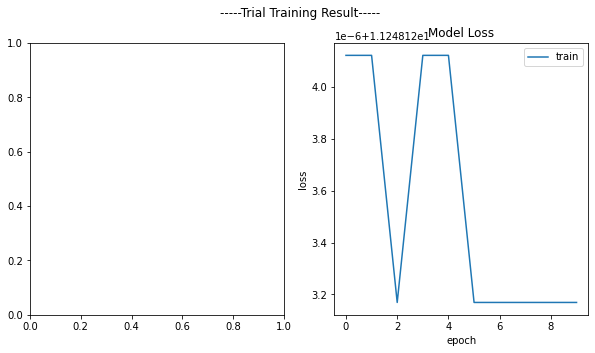

Evaluating targets...
1/1 [==============================] - 0s 99ms/step - loss: 11.2369
  Loss: 11.23687649
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073966 0.2467694  0.24838202 0.25410894]]
  LSTM entry: [[[0.25073966 0.2467694  0.24838202 0.25410894]]]
Softmax predict on new input_x
 controller_pred: [[0.2507397  0.24677135 0.2483782  0.25411078]]


 ------ Training 41 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.90067, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.53850 | EER_interp: 0.54010 | ACC: 0.46000
  Task  1: n_1             | EER_mean: 0.44680 | EER_interp: 0.44980 | ACC: 0.55000
  Task  2: n_2             | EER_mean: 0.51850 | EER_interp: 0.50920 | ACC: 0.49000
  Task  3: n_3             | EER_mean: 0.52940 | EER_interp: 0.53000 | ACC: 0.47000
  Task  4: n_4             | EER_mean: 0.43400 | EER_interp: 0.42980 | ACC: 0.57000
  Task  5: n_5             | EER_mean: 0.57780 | EER_interp: 0.57980 | ACC: 0.42000
  Task  6: n_6             | EER_mean: 0.56520 | EER_interp: 0.56040 | ACC: 0.44000
  Task  7: n_7             | EER_mean: 0.45450 | EER_interp: 0.44160 | ACC: 0.56000
  Task  8: n_8             | EER_mean: 0.49090 | EER_interp: 0.47880 | ACC: 0.52000
  Task  9: n_9             | EER_mean: 0.40820 | EER_interp: 0.40020 | ACC: 0.

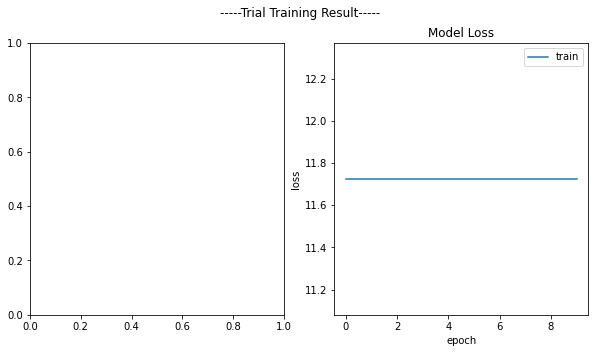

Evaluating targets...
1/1 [==============================] - 0s 101ms/step - loss: 11.7134
  Loss: 11.71341419
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.2507397  0.24677135 0.2483782  0.25411078]]
  LSTM entry: [[[0.2507397  0.24677135 0.2483782  0.25411078]]]
Softmax predict on new input_x
 controller_pred: [[0.25073972 0.24677435 0.24837232 0.25411364]]


 ------ Training 42 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.78248, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.52080 | EER_interp: 0.50080 | ACC: 0.50000
  Task  1: n_1             | EER_mean: 0.44680 | EER_interp: 0.44040 | ACC: 0.56000
  Task  2: n_2             | EER_mean: 0.51850 | EER_interp: 0.49840 | ACC: 0.50000
  Task  3: n_3             | EER_mean: 0.42860 | EER_interp: 0.41040 | ACC: 0.59000
  Task  4: n_4             | EER_mean: 0.46810 | EER_interp: 0.45100 | ACC: 0.55000
  Task  5: n_5             | EER_mean: 0.55560 | EER_interp: 0.54140 | ACC: 0.46000
  Task  6: n_6             | EER_mean: 0.67390 | EER_interp: 0.67030 | ACC: 0.33000
  Task  7: n_7             | EER_mean: 0.55360 | EER_interp: 0.54960 | ACC: 0.45000
  Task  8: n_8             | EER_mean: 0.48890 | EER_interp: 0.48080 | ACC: 0.52000
  Task  9: n_9             | EER_mean: 0.41180 | EER_interp: 0.41000 | ACC: 0.

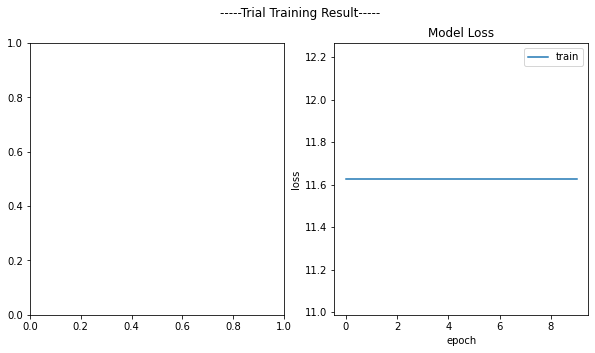

Evaluating targets...
1/1 [==============================] - 0s 98ms/step - loss: 11.6151
  Loss: 11.61514854
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073972 0.24677435 0.24837232 0.25411364]]
  LSTM entry: [[[0.25073972 0.24677435 0.24837232 0.25411364]]]
Softmax predict on new input_x
 controller_pred: [[0.2507397  0.24677537 0.24837027 0.25411463]]


 ------ Training 43 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 1.27272, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.51920 | EER_interp: 0.52000 | ACC: 0.48000
  Task  1: n_1             | EER_mean: 0.50940 | EER_interp: 0.49940 | ACC: 0.50000
  Task  2: n_2             | EER_mean: 0.56520 | EER_interp: 0.56960 | ACC: 0.43000
  Task  3: n_3             | EER_mean: 0.55100 | EER_interp: 0.55980 | ACC: 0.44000
  Task  4: n_4             | EER_mean: 0.33960 | EER_interp: 0.34000 | ACC: 0.66000
  Task  5: n_5             | EER_mean: 0.50910 | EER_interp: 0.51010 | ACC: 0.49000
  Task  6: n_6             | EER_mean: 0.50000 | EER_interp: 0.51080 | ACC: 0.49000
  Task  7: n_7             | EER_mean: 0.50000 | EER_interp: 0.50000 | ACC: 0.50000
  Task  8: n_8             | EER_mean: 0.57780 | EER_interp: 0.57980 | ACC: 0.42000
  Task  9: n_9             | EER_mean: 0.47060 | EER_interp: 0.50060 | ACC: 0.

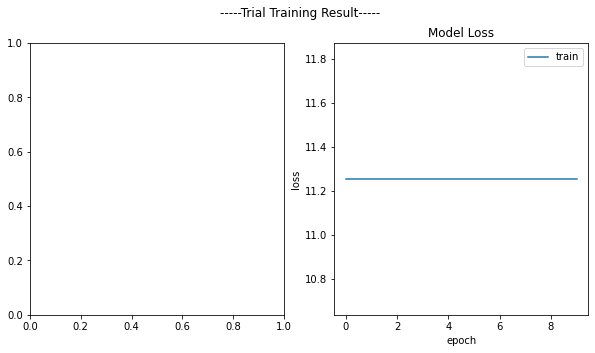

Evaluating targets...
1/1 [==============================] - 0s 102ms/step - loss: 11.2426
  Loss: 11.24263
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.2507397  0.24677537 0.24837027 0.25411463]]
  LSTM entry: [[[0.2507397  0.24677537 0.24837027 0.25411463]]]
Softmax predict on new input_x
 controller_pred: [[0.25073966 0.24677576 0.24836959 0.25411496]]


 ------ Training 44 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.82802, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.48080 | EER_interp: 0.46960 | ACC: 0.53000
  Task  1: n_1             | EER_mean: 0.53190 | EER_interp: 0.53960 | ACC: 0.46000
  Task  2: n_2             | EER_mean: 0.58700 | EER_interp: 0.60830 | ACC: 0.39000
  Task  3: n_3             | EER_mean: 0.48980 | EER_interp: 0.48020 | ACC: 0.52000
  Task  4: n_4             | EER_mean: 0.58490 | EER_interp: 0.57970 | ACC: 0.42000
  Task  5: n_5             | EER_mean: 0.48890 | EER_interp: 0.48080 | ACC: 0.52000
  Task  6: n_6             | EER_mean: 0.50000 | EER_interp: 0.50000 | ACC: 0.50000
  Task  7: n_7             | EER_mean: 0.39290 | EER_interp: 0.38970 | ACC: 0.61000
  Task  8: n_8             | EER_mean: 0.51110 | EER_interp: 0.51010 | ACC: 0.49000
  Task  9: n_9             | EER_mean: 0.51020 | EER_interp: 0.50020 | ACC: 0.

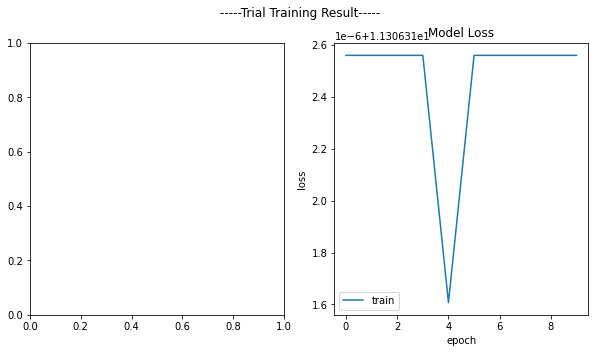

Evaluating targets...
1/1 [==============================] - 0s 102ms/step - loss: 11.2950
  Loss: 11.2950058
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073966 0.24677576 0.24836959 0.25411496]]
  LSTM entry: [[[0.25073966 0.24677576 0.24836959 0.25411496]]]
Softmax predict on new input_x
 controller_pred: [[0.2507397  0.24677642 0.24836826 0.2541156 ]]


 ------ Training 45 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.78716, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.55770 | EER_interp: 0.57050 | ACC: 0.43000
  Task  1: n_1             | EER_mean: 0.41510 | EER_interp: 0.40970 | ACC: 0.59000
  Task  2: n_2             | EER_mean: 0.55560 | EER_interp: 0.54960 | ACC: 0.45000
  Task  3: n_3             | EER_mean: 0.42860 | EER_interp: 0.43000 | ACC: 0.57000
  Task  4: n_4             | EER_mean: 0.59570 | EER_interp: 0.59980 | ACC: 0.40000
  Task  5: n_5             | EER_mean: 0.50910 | EER_interp: 0.51010 | ACC: 0.49000
  Task  6: n_6             | EER_mean: 0.41300 | EER_interp: 0.41020 | ACC: 0.59000
  Task  7: n_7             | EER_mean: 0.55360 | EER_interp: 0.54960 | ACC: 0.45000
  Task  8: n_8             | EER_mean: 0.50910 | EER_interp: 0.51010 | ACC: 0.49000
  Task  9: n_9             | EER_mean: 0.55100 | EER_interp: 0.55000 | ACC: 0.

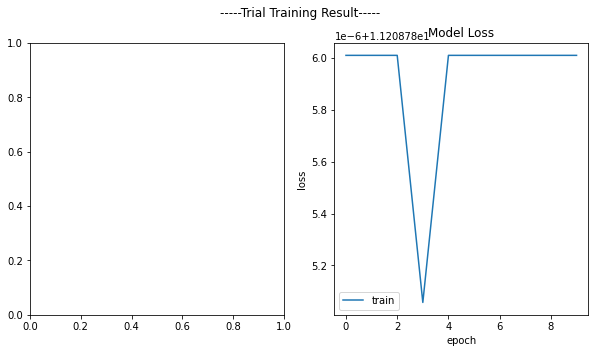

Evaluating targets...
1/1 [==============================] - 0s 106ms/step - loss: 11.1976
  Loss: 11.19757652
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.2507397  0.24677642 0.24836826 0.2541156 ]]
  LSTM entry: [[[0.2507397  0.24677642 0.24836826 0.2541156 ]]]
Softmax predict on new input_x
 controller_pred: [[0.25073972 0.24677749 0.24836622 0.25411662]]


 ------ Training 46 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 1.09762, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.52080 | EER_interp: 0.52000 | ACC: 0.48000
  Task  1: n_1             | EER_mean: 0.44680 | EER_interp: 0.44980 | ACC: 0.55000
  Task  2: n_2             | EER_mean: 0.52170 | EER_interp: 0.51080 | ACC: 0.49000
  Task  3: n_3             | EER_mean: 0.44900 | EER_interp: 0.45000 | ACC: 0.55000
  Task  4: n_4             | EER_mean: 0.54720 | EER_interp: 0.52890 | ACC: 0.47000
  Task  5: n_5             | EER_mean: 0.52730 | EER_interp: 0.54140 | ACC: 0.46000
  Task  6: n_6             | EER_mean: 0.56520 | EER_interp: 0.56040 | ACC: 0.44000
  Task  7: n_7             | EER_mean: 0.52270 | EER_interp: 0.52920 | ACC: 0.47000
  Task  8: n_8             | EER_mean: 0.46670 | EER_interp: 0.46970 | ACC: 0.53000
  Task  9: n_9             | EER_mean: 0.48980 | EER_interp: 0.48020 | ACC: 0.

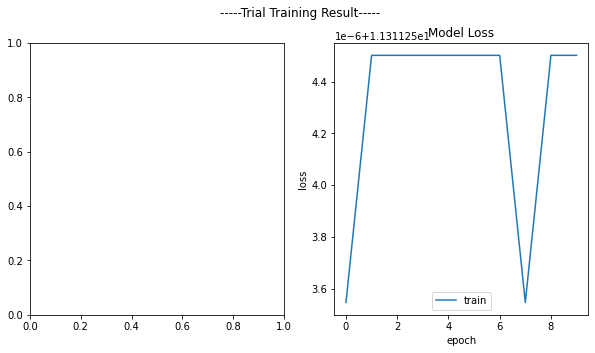

Evaluating targets...
1/1 [==============================] - 0s 104ms/step - loss: 11.2999
  Loss: 11.29994202
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073972 0.24677749 0.24836622 0.25411662]]
  LSTM entry: [[[0.25073972 0.24677749 0.24836622 0.25411662]]]
Softmax predict on new input_x
 controller_pred: [[0.25073972 0.24677905 0.24836309 0.2541181 ]]


 ------ Training 47 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.80251, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
4/4 [==============================] - 1s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.60420 | EER_interp: 0.59050 | ACC: 0.41000
  Task  1: n_1             | EER_mean: 0.52830 | EER_interp: 0.51940 | ACC: 0.48000
  Task  2: n_2             | EER_mean: 0.45650 | EER_interp: 0.45980 | ACC: 0.54000
  Task  3: n_3             | EER_mean: 0.47060 | EER_interp: 0.47000 | ACC: 0.53000
  Task  4: n_4             | EER_mean: 0.40430 | EER_interp: 0.40020 | ACC: 0.60000
  Task  5: n_5             | EER_mean: 0.45450 | EER_interp: 0.43840 | ACC: 0.56000
  Task  6: n_6             | EER_mean: 0.43480 | EER_interp: 0.42110 | ACC: 0.58000
  Task  7: n_7             | EER_mean: 0.52270 | EER_interp: 0.52030 | ACC: 0.48000
  Task  8: n_8             | EER_mean: 0.57780 | EER_interp: 0.57070 | ACC: 0.43000
  Task  9: n_9             | EER_mean: 0.46940 | EER_interp: 0.46020 | ACC: 0.

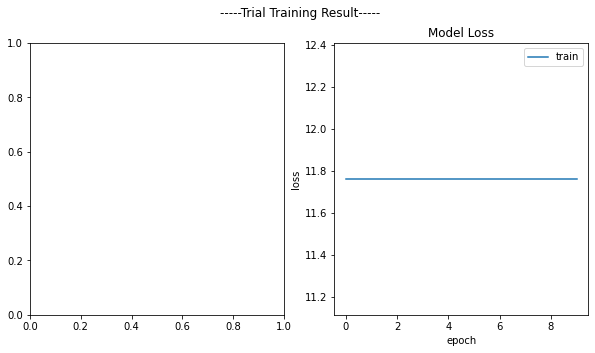

Evaluating targets...
1/1 [==============================] - 0s 101ms/step - loss: 11.7514
  Loss: 11.75140476
====================FINISHING TRIAL====================


==================== STARTING NEW TRIAL ====================
 Selecting new config...
  Memory is not empty
  Last Trial Conf: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2}
  Last Trial Orig Vals: [[0.25073972 0.24677905 0.24836309 0.2541181 ]]
  LSTM entry: [[[0.25073972 0.24677905 0.24836309 0.2541181 ]]]
Softmax predict on new input_x
 controller_pred: [[0.25073972 0.24678005 0.24836117 0.25411907]]


 ------ Training 48 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 2} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984


In [ ]:
runner.run_neural_architeture_search()

# Create Model with Best Config Found

In [12]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Visualize Model

In [13]:
%%capture
runner.visualize_model(outfile_path=f"figs/nas/nas_model_approach_1.png")

In [14]:
%%capture
runner.model_summary()

# Training Model

In [15]:
runner.train_model()

-------------------- train model -------------------
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984
Epoch 1/10
1500/1500 [==============================] - 223s 146ms/step - loss: 0.0545 - tshirt_loss: 0.0811 - trouser_loss: 0.0143 - pullover_loss: 0.0771 - dress_loss: 0.0602 - coat_loss: 0.0851 - sandal_loss: 0.0209 - shirt_loss: 0.1294 - sneaker_loss: 0.0318 - bag_loss: 0.0167 - ankle_boot_loss: 0.0281 - tshirt_accuracy: 0.9671 - trouser_accuracy: 0.9952 - pullover_accuracy: 0.9706 - dress_accuracy: 0.9766 - coat_accuracy: 0.9659 - sandal_accuracy: 0.9928 - shirt_accuracy: 0.9452 - sneaker_accuracy: 0.9881 - bag_accuracy: 0.9948 - ankle_boot_accuracy: 0.9899 - val_loss: 0.1163 - val_tshirt_loss: 0.1160 - val_trouser_loss: 0.0261 - val_pullover_loss: 0.0740 - val_dress_loss: 0.0910 - val_coat_loss: 0.0658 - val_sandal_loss: 0.5394 - val_shirt_loss: 0.1277 - val_sneaker_los

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/10
1500/1500 [==============================] - 226s 151ms/step - loss: 0.0366 - tshirt_loss: 0.0588 - trouser_loss: 0.0061 - pullover_loss: 0.0557 - dress_loss: 0.0393 - coat_loss: 0.0570 - sandal_loss: 0.0093 - shirt_loss: 0.0962 - sneaker_loss: 0.0192 - bag_loss: 0.0067 - ankle_boot_loss: 0.0173 - tshirt_accuracy: 0.9767 - trouser_accuracy: 0.9983 - pullover_accuracy: 0.9795 - dress_accuracy: 0.9853 - coat_accuracy: 0.9780 - sandal_accuracy: 0.9966 - shirt_accuracy: 0.9604 - sneaker_accuracy: 0.9930 - bag_accuracy: 0.9978 - ankle_boot_accuracy: 0.9936 - val_loss: 0.0625 - val_tshirt_loss: 0.0772 - val_trouser_loss: 0.0475 - val_pullover_loss: 0.0693 - val_dress_loss: 0.0615 - val_coat_loss: 0.0679 - val_sandal_loss: 0.0209 - val_shirt_loss: 0.1874 - val_sneaker_loss: 0.0419 - val_bag_loss: 0.0251 - val_ankle_boot_loss: 0.0264 - val_tshirt_accuracy: 0.9731 - val_trouser_accuracy: 0.9875 - val_pullover_accuracy: 0.9751 - val_dress_accuracy: 0.9765 - val_coat_accuracy: 0.9770 -

# Plots

-------------------- draw training history -------------------


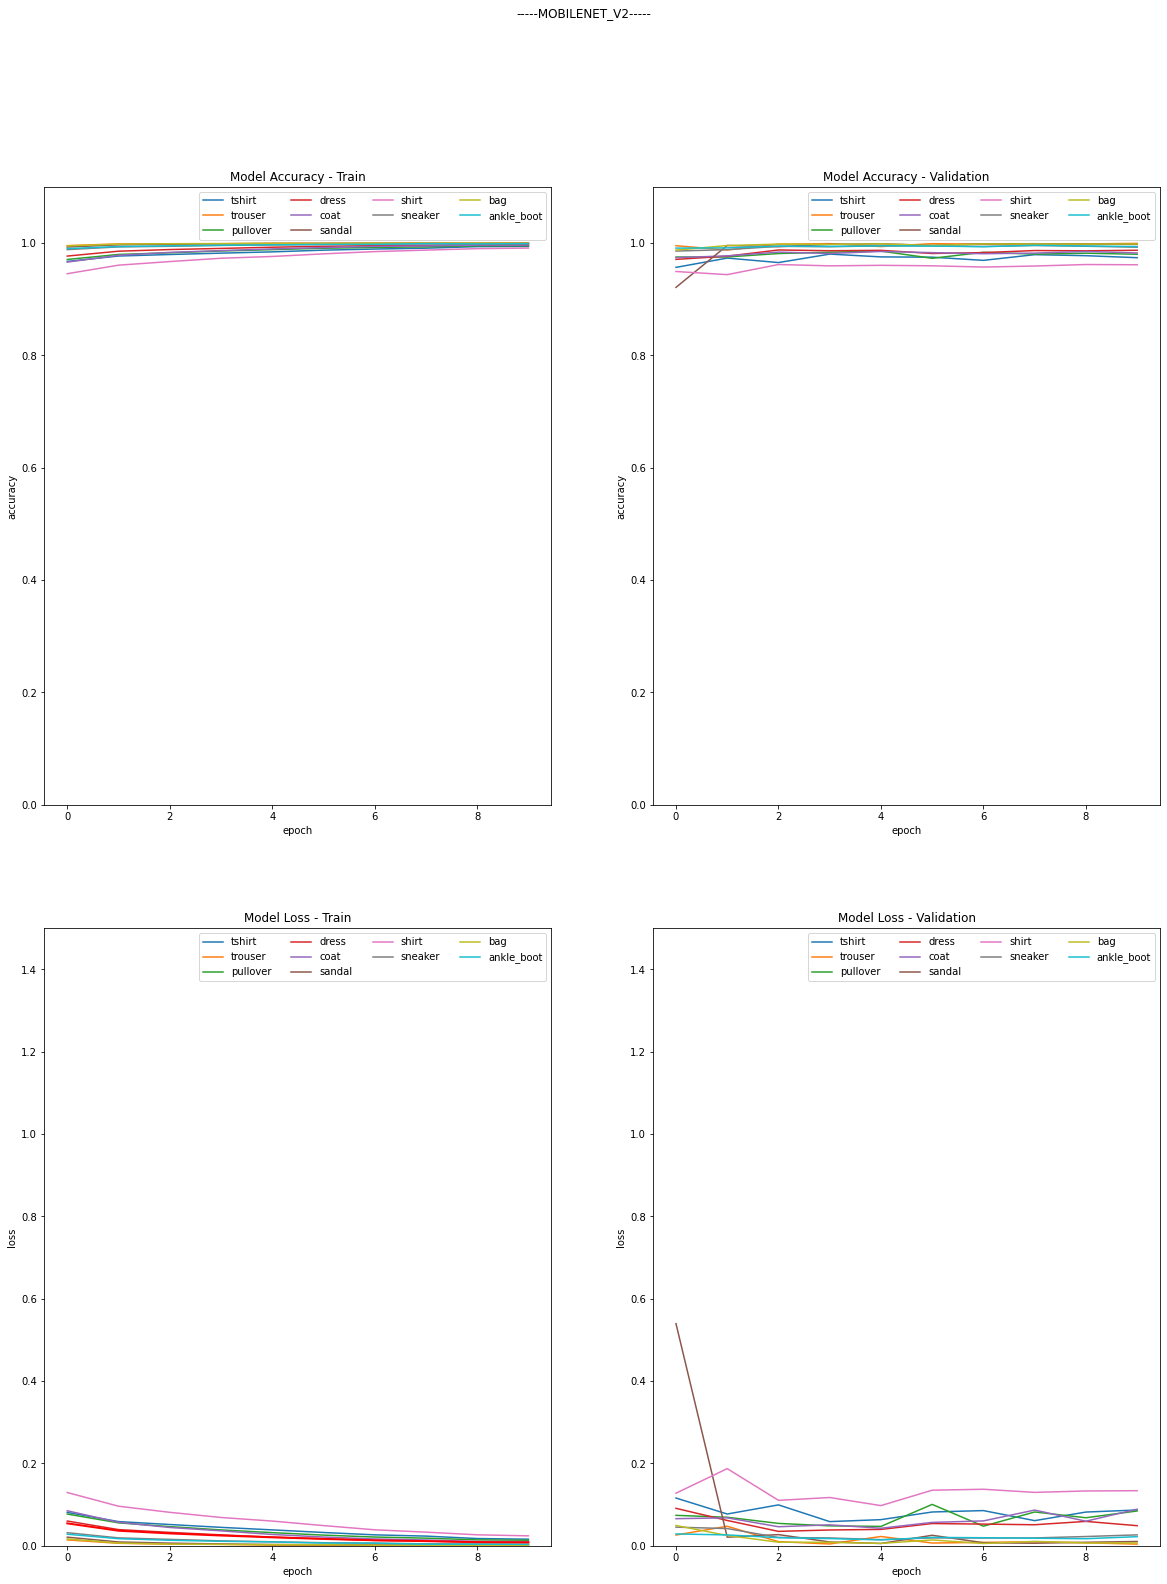

In [16]:
runner.draw_training_history()

# Load Best Model

In [17]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [18]:
runner.save_model()

-------------------- save model -------------------
Saving model


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

In [19]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: tshirt          | EER_mean: 0.03070 | EER_interp: 0.03080 | ACC: 0.96920
  Task  1: trouser         | EER_mean: 0.00330 | EER_interp: 0.00240 | ACC: 0.99830
  Task  2: pullover        | EER_mean: 0.02860 | EER_interp: 0.02810 | ACC: 0.97230
  Task  3: dress           | EER_mean: 0.01740 | EER_interp: 0.01730 | ACC: 0.98270
  Task  4: coat            | EER_mean: 0.02880 | EER_interp: 0.02880 | ACC: 0.97120
  Task  5: sandal          | EER_mean: 0.00330 | EER_interp: 0.00320 | ACC: 0.99680
  Task  6: shirt           | EER_mean: 0.05820 | EER_interp: 0.05820 | ACC: 0.94180
  Task  7: sneaker         | EER_mean: 0.00650 | EER_interp: 0.00640 | ACC: 0.99360
  Task  8: bag             | EER_mean: 0.00350 | EER_interp: 0.00340 | ACC: 0.99650
  Task  9: ankle_boot      | EER_mean: 0.00790 | EER_interp: 0.00780 | ACC: 0.99220
final_EER_mean: 1.86% | final_EER_media

## Test Split

In [20]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
313/313 [==============================] - 7s 23ms/step  - ETA
Prediction finished!
  Task  0: tshirt          | EER_mean: 0.03300 | EER_interp: 0.03300 | ACC: 0.96710
  Task  1: trouser         | EER_mean: 0.00600 | EER_interp: 0.00600 | ACC: 0.99400
  Task  2: pullover        | EER_mean: 0.03740 | EER_interp: 0.03720 | ACC: 0.96260
  Task  3: dress           | EER_mean: 0.02070 | EER_interp: 0.02040 | ACC: 0.97940
  Task  4: coat            | EER_mean: 0.03070 | EER_interp: 0.03080 | ACC: 0.96930
  Task  5: sandal          | EER_mean: 0.00400 | EER_interp: 0.00400 | ACC: 0.99590
  Task  6: shirt           | EER_mean: 0.05810 | EER_interp: 0.05800 | ACC: 0.94190
  Task  7: sneaker         | EER_mean: 0.00860 | EER_interp: 0.00880 | ACC: 0.99140
  Task  8: bag             | EER_mean: 0.00310 | EER_interp: 0.00300 | ACC: 0.99690
  Task  9: ankle_boot      | EER_mean: 0.01180 | EER_interp: 0.01190 | ACC: 0.98820
final_EER_mean: 2.13% | final_EE

# Visualize Model Classification

# Finishing Experiment Manager

In [21]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 38569 operations to synchronize with Neptune. Do not kill this process.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Stil

# Testing Network Modification

# Test - Customized Loss Function

# Test - 